# **Step 1: Reading and Understanding the data set**

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
lead=pd.read_csv("Leads.csv")

In [3]:
#checking the data
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking the number of entries in the dataset
class color:
   BLUE = '\033[94m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + color.BLUE+'Application DataFrame' + color.END+"\n")
print('Number of rows:',lead.shape[0])
print('Number of columns:',lead.shape[1] )

Application DataFrame

Number of rows: 9240
Number of columns: 37


In [5]:
#checking basic information about the dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#checking the statistical information about the dataset
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# **Step 2: Data Cleaning and Preparation**

## **2.1: Starting with the simplest steps checking data and data types**

In [7]:
#First step is to check what type of datatypes are we dealing with
#From the output we see three prominent data type: int64, float64 and object
lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [8]:
#checking the first few rows
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## **2.2: Cleaning the data**

In [9]:
#for a little ease of analysis converting the data to lower case
lead =lead.applymap(lambda data:data.lower() if type(data) == str else data)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,select,select,unemployed,better career prospects,no,no,no,no,no,no,no,no,interested in other courses,low in relevance,no,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,select,select,unemployed,better career prospects,no,no,no,no,no,no,no,no,ringing,NaN,no,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,select,student,better career prospects,no,no,no,no,no,no,no,no,will revert after reading the email,might be,no,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no,no,no,ringing,not sure,no,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,select,other,unemployed,better career prospects,no,no,no,no,no,no,no,no,will revert after reading the email,might be,no,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


**Handling the "Select" Category**
*   Now from the above data we see that many of the categorical variables has value as Select which actually does not have any meaning it just indicates that the lead has not selected any of the categories.
*   this is as good as having null values in the dataset. So this is the first step we will do. Replace the Select values as null values


In [10]:
#replacing Select with null values
lead=lead.replace("select",np.nan)

In [11]:
#checking the total number of null values that are present in the dataset
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
#checking percentage of null values and storing into a temp dataframe
null_percentage=round(100*lead.isnull().sum()/lead.shape[0],2).reset_index().rename(columns={"index":"column name",0:"Missing Values Percentage"})
null_percentage

,column name,Missing Values Percentage
0,Prospect ID,0.00
1,Lead Number,0.00
2,Lead Origin,0.00
3,Lead Source,0.39
4,Do Not Email,0.00
5,Do Not Call,0.00
6,Converted,0.00
7,TotalVisits,1.48
8,Total Time Spent on Website,0.00
9,Page Views Per Visit,1.48


In [13]:
#now we see that a lot of columns have missing values.
# as rule of thumb going ahead and deleting columns that have more than 40% missing values
value_limit=40 #chosen cut-off

columnsmorethan40=list(null_percentage[null_percentage["Missing Values Percentage"]> value_limit]["column name"])

print("Total number of columns that have more than 40% missing values:",len(columnsmorethan40))
print("List of columns that have more than 40% missing values:\n", columnsmorethan40,end='\n')

Total number of columns that have more than 40% missing values: 7
List of columns that have more than 40% missing values:
 ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


**So we have around 5 columns that have more than 50% missing values**
1. Lead Quality
2. Asymmetrique Activity Index
3. Asymmetrique Profile Index
4. Asymmetrique Activity Score
5. Asymmetrique Profile Score

Now imputing null values for more than 50% missing values does not make sense. But as mentioned in the data dictionary Lead Quality contains information about the quality of lead based on the data and intuition the the employee who has been assigned to the lead.

**Before removing this column altogether we can do a bit of data exploration and check the values.**

In [14]:
#checking the values in the lead quality column
lead["Lead Quality"].value_counts()

Lead Quality
might be             1560
not sure             1092
high in relevance     637
worst                 601
low in relevance      583
Name: count, dtype: int64

Now here High in relevance are the potential leads in the data. Even if the data has high percentage of missing values removing these rows could be information loss in this case. Instead of removing let's try to fill the missing values with a lead quality named as **Cannot Say**.
**Cannot say definition**: Will define that the employee who was assigned to the lead does not have any intuition about the lead.

In [15]:
#total number of null values
lead["Lead Quality"].isnull().sum()

4767

In [16]:
#filling the missing values with Cannot Say as an intuition
lead["Lead Quality"]=lead["Lead Quality"].fillna("Cannot Say")

In [17]:
#now again checking the missing values
lead["Lead Quality"].isnull().sum()

0

Next we had four similar types of columns that has around same percentage of missing values. It could be that all of these columns will have the same rows where we might have missing values and these columns can also have multicollinearity between them. Let's check the values for one of these columns

In [18]:
lead["Asymmetrique Activity Index"].value_counts()

Asymmetrique Activity Index
02.medium    3839
01.high       821
03.low        362
Name: count, dtype: int64

In [19]:
lead["Asymmetrique Profile Index"].value_counts()

Asymmetrique Profile Index
02.medium    2788
01.high      2203
03.low         31
Name: count, dtype: int64

Since these columns have high missing values. We can keep one column and impute value there and rest of the columns can be dropped.

In [20]:
#dropping the columns
lead=lead.drop(['Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [21]:
#since Asymmetrique Activity Index is a categorical columns let's try to fix the values and standardize the columns
lead["Asymmetrique Activity Index"]=lead["Asymmetrique Activity Index"].apply(lambda value:1 if value=='01.high' else 2 if value=='02.medium' else 3)

In [22]:
#checking the updated values now
lead["Asymmetrique Activity Index"].value_counts()

Asymmetrique Activity Index
3    4580
2    3839
1     821
Name: count, dtype: int64

In [23]:
#checking the percentage of null values again
null_percentage=round(100*lead.isnull().sum()/lead.shape[0],2).reset_index().rename(columns={"index":"column name",0:"Missing Values Percentage"})
null_percentage

,column name,Missing Values Percentage
0,Prospect ID,0.00
1,Lead Number,0.00
2,Lead Origin,0.00
3,Lead Source,0.39
4,Do Not Email,0.00
5,Do Not Call,0.00
6,Converted,0.00
7,TotalVisits,1.48
8,Total Time Spent on Website,0.00
9,Page Views Per Visit,1.48


In [24]:
#now many other columns have null values. Replacing all the remaining column with Unknown
lead[["What is your current occupation","How did you hear about X Education","What matters most to you in choosing a course","Lead Profile","City","Country","Tags","Specialization" ]]=lead[["What is your current occupation","How did you hear about X Education","What matters most to you in choosing a course","Lead Profile","City","Country","Tags","Specialization" ]].fillna("Unknown")

In [25]:
#now let's see the updated percentage count
null_percentage=round(100*lead.isnull().sum()/lead.shape[0],2).reset_index().rename(columns={"index":"column name",0:"Missing Values Percentage"})
null_percentage

,column name,Missing Values Percentage
0,Prospect ID,0.00
1,Lead Number,0.00
2,Lead Origin,0.00
3,Lead Source,0.39
4,Do Not Email,0.00
5,Do Not Call,0.00
6,Converted,0.00
7,TotalVisits,1.48
8,Total Time Spent on Website,0.00
9,Page Views Per Visit,1.48


In [26]:
#for rest of the columns with very low percentage of null values we can drop these rows
lead=lead.dropna()

In [27]:
#now all the null values have been handled. let's confirm it once again
null_percentage=round(100*lead.isnull().sum()/lead.shape[0],2).reset_index().rename(columns={"index":"column name",0:"Missing Values Percentage"})
null_percentage

,column name,Missing Values Percentage
0,Prospect ID,0.0
1,Lead Number,0.0
2,Lead Origin,0.0
3,Lead Source,0.0
4,Do Not Email,0.0
5,Do Not Call,0.0
6,Converted,0.0
7,TotalVisits,0.0
8,Total Time Spent on Website,0.0
9,Page Views Per Visit,0.0


With the above steps we have done the major task of data cleaning which is removing the null values.

In [28]:
#before moving with EDA let's confirm the data and corresponding data types
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,Unknown,Unknown,Unknown,unemployed,better career prospects,no,no,no,no,no,no,no,no,interested in other courses,low in relevance,no,no,Unknown,Unknown,2,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,Unknown,Unknown,unemployed,better career prospects,no,no,no,no,no,no,no,no,ringing,Cannot Say,no,no,Unknown,Unknown,2,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,Unknown,student,better career prospects,no,no,no,no,no,no,no,no,will revert after reading the email,might be,no,no,potential lead,mumbai,2,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no,no,no,ringing,not sure,no,no,Unknown,mumbai,2,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,Unknown,other,unemployed,better career prospects,no,no,no,no,no,no,no,no,will revert after reading the email,might be,no,no,Unknown,mumbai,2,no,no,modified


In [29]:
#cross-verifying that every column has correct datatype
lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [30]:
#now Profile and Lead Number do not carry any significance in the model building so dropping these values right now
lead=lead.drop(["Prospect ID","Lead Number"],axis=1)

In [31]:
#checking the number of columns we are left with now
lead.shape

(9074, 32)

# **Step 3: Exploratory Data Analysis**

## **Step 3.1: Univariate Analysis**

### **Step 3.1.1 Categorical variables**

In [32]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [33]:
#creating a list for the columns that have object data type
cat_col=lead.select_dtypes(include="object").columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City',
       'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

Starting by creating plot for the first few columns

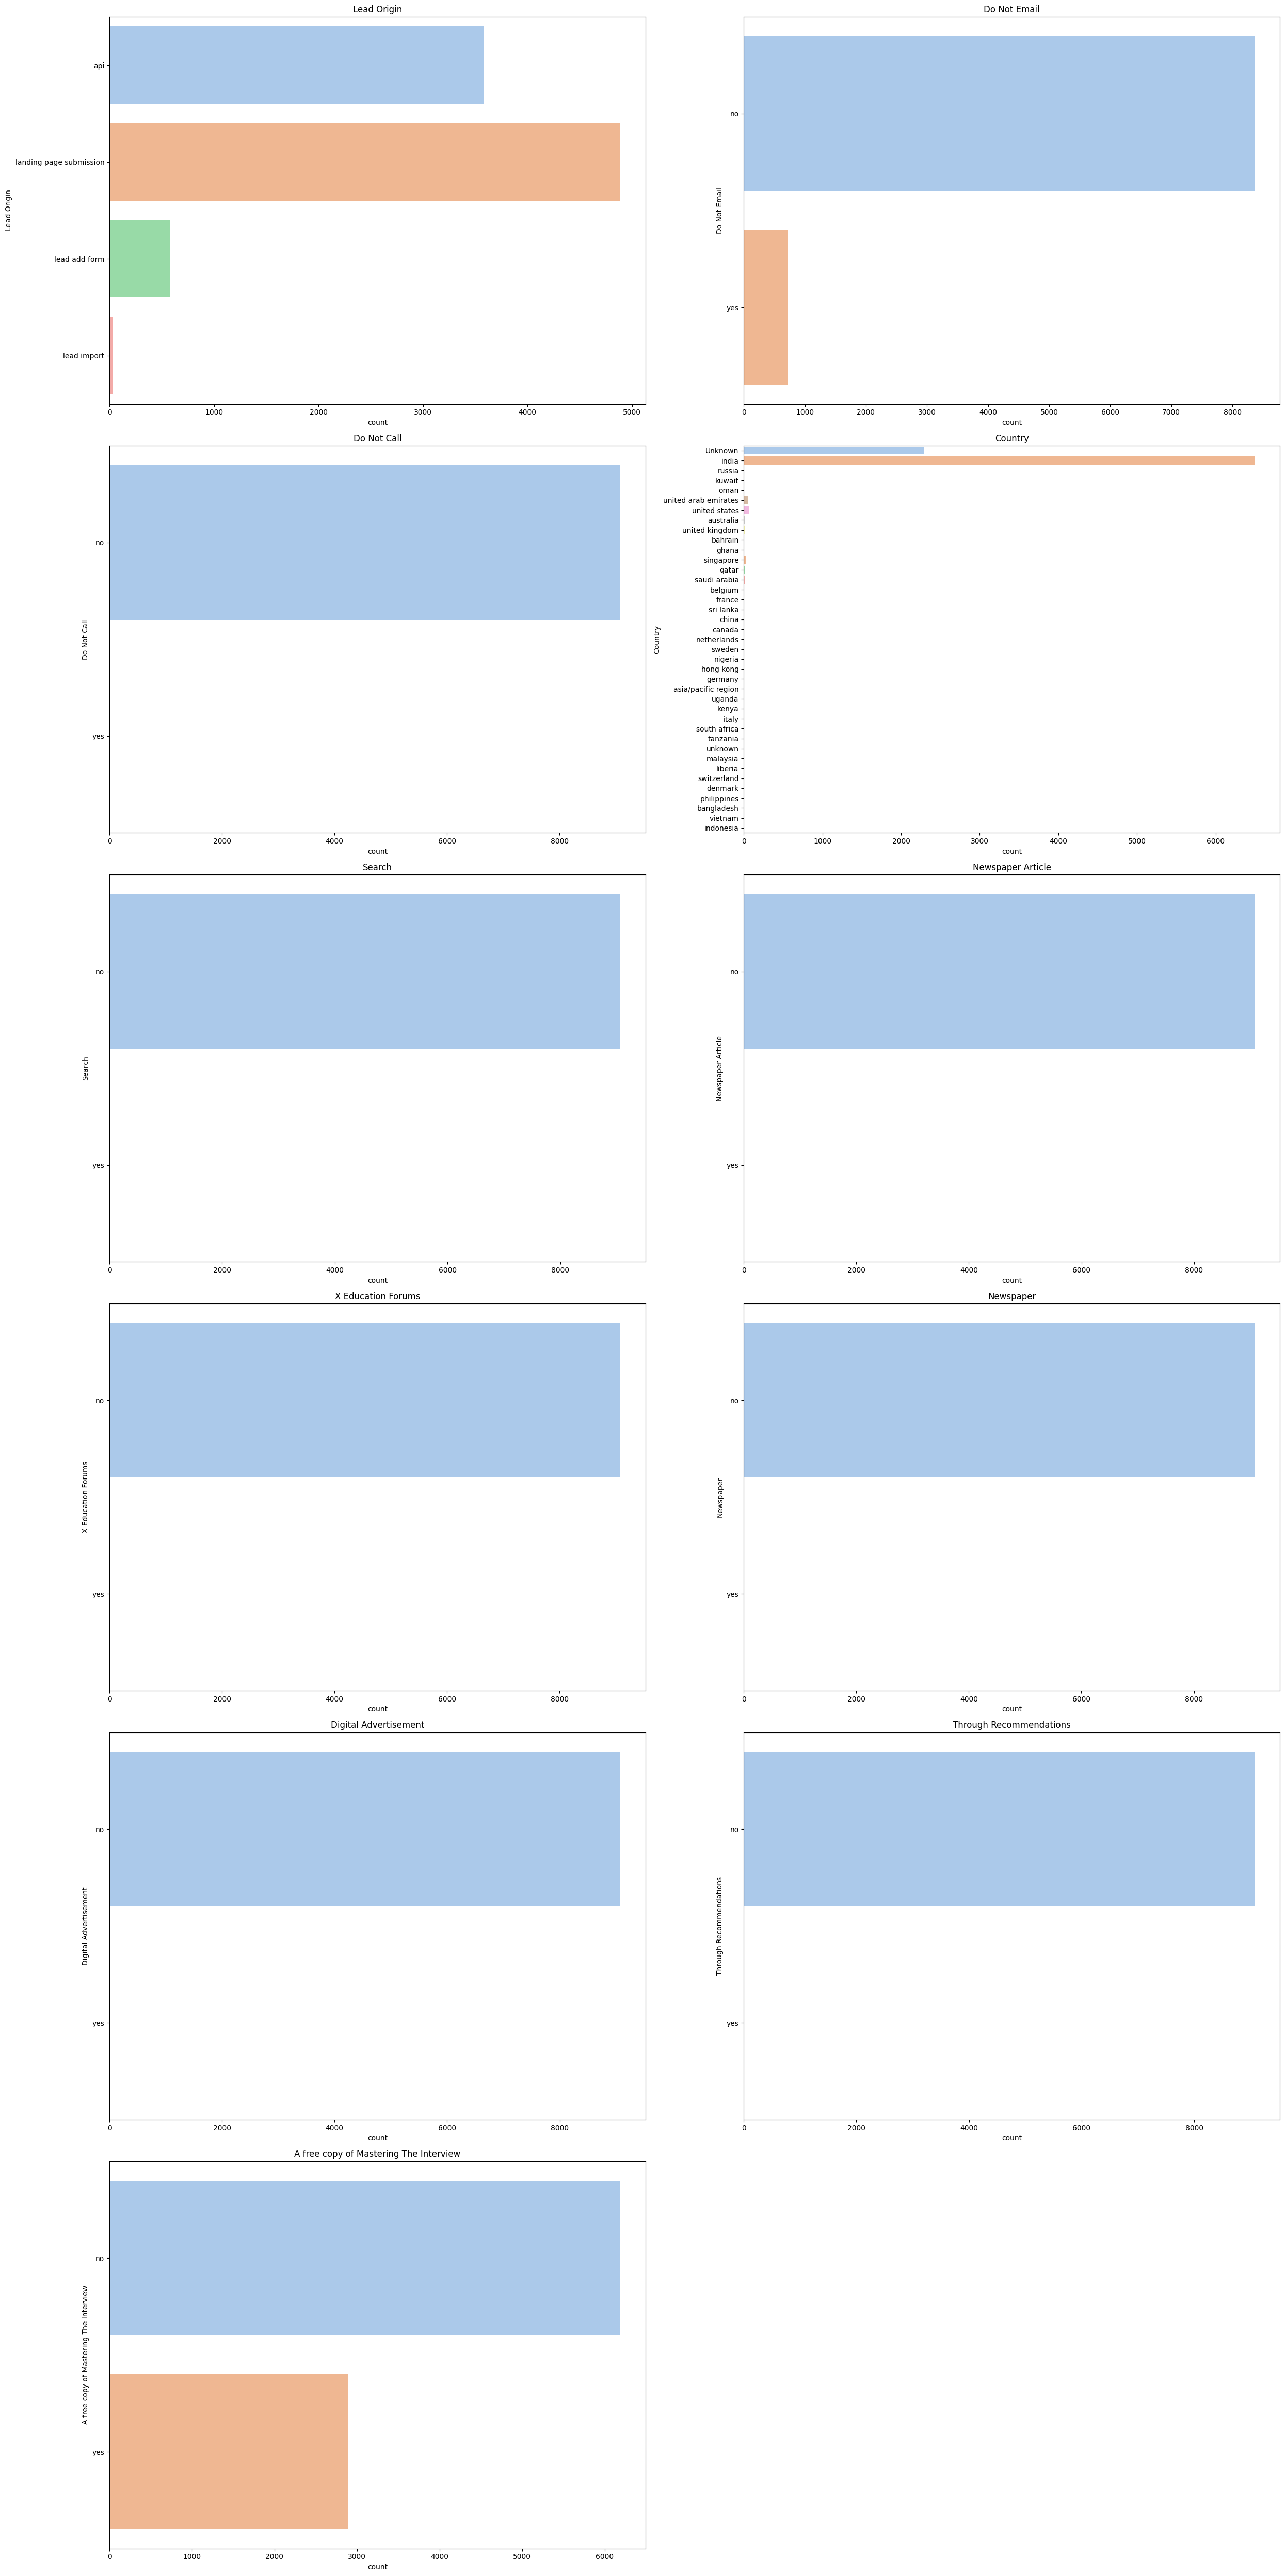

In [34]:
plt.figure(figsize = (25,50))

plt.subplot(6,2,1)
sns.countplot(lead['Lead Origin'],palette='pastel')
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead['Do Not Email'],palette='pastel')
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(lead['Do Not Call'],palette='pastel')
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead['Country'],palette='pastel')
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(lead['Search'],palette='pastel')
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(lead['Newspaper Article'],palette='pastel')
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(lead['X Education Forums'],palette='pastel')
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(lead['Newspaper'],palette='pastel')
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(lead['Digital Advertisement'],palette='pastel')
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(lead['Through Recommendations'],palette='pastel')
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(lead['A free copy of Mastering The Interview'],palette='pastel')
plt.title('A free copy of Mastering The Interview')
plt.tight_layout()
plt.show()

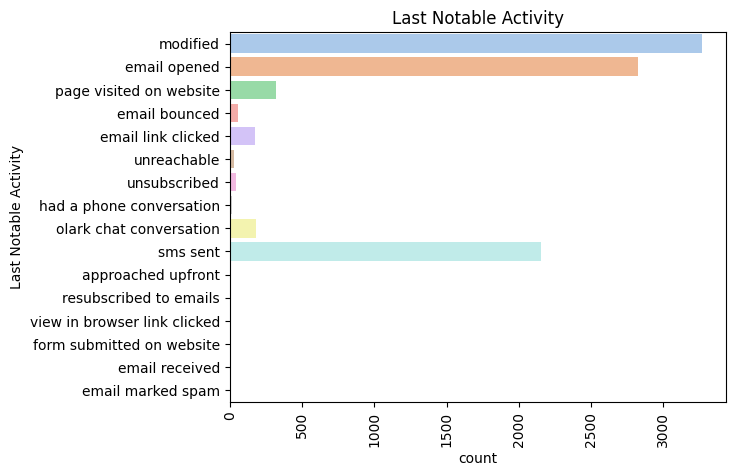

In [35]:
sns.countplot(lead['Last Notable Activity'],palette='pastel').tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

Now we can check for more important columns in the dataset

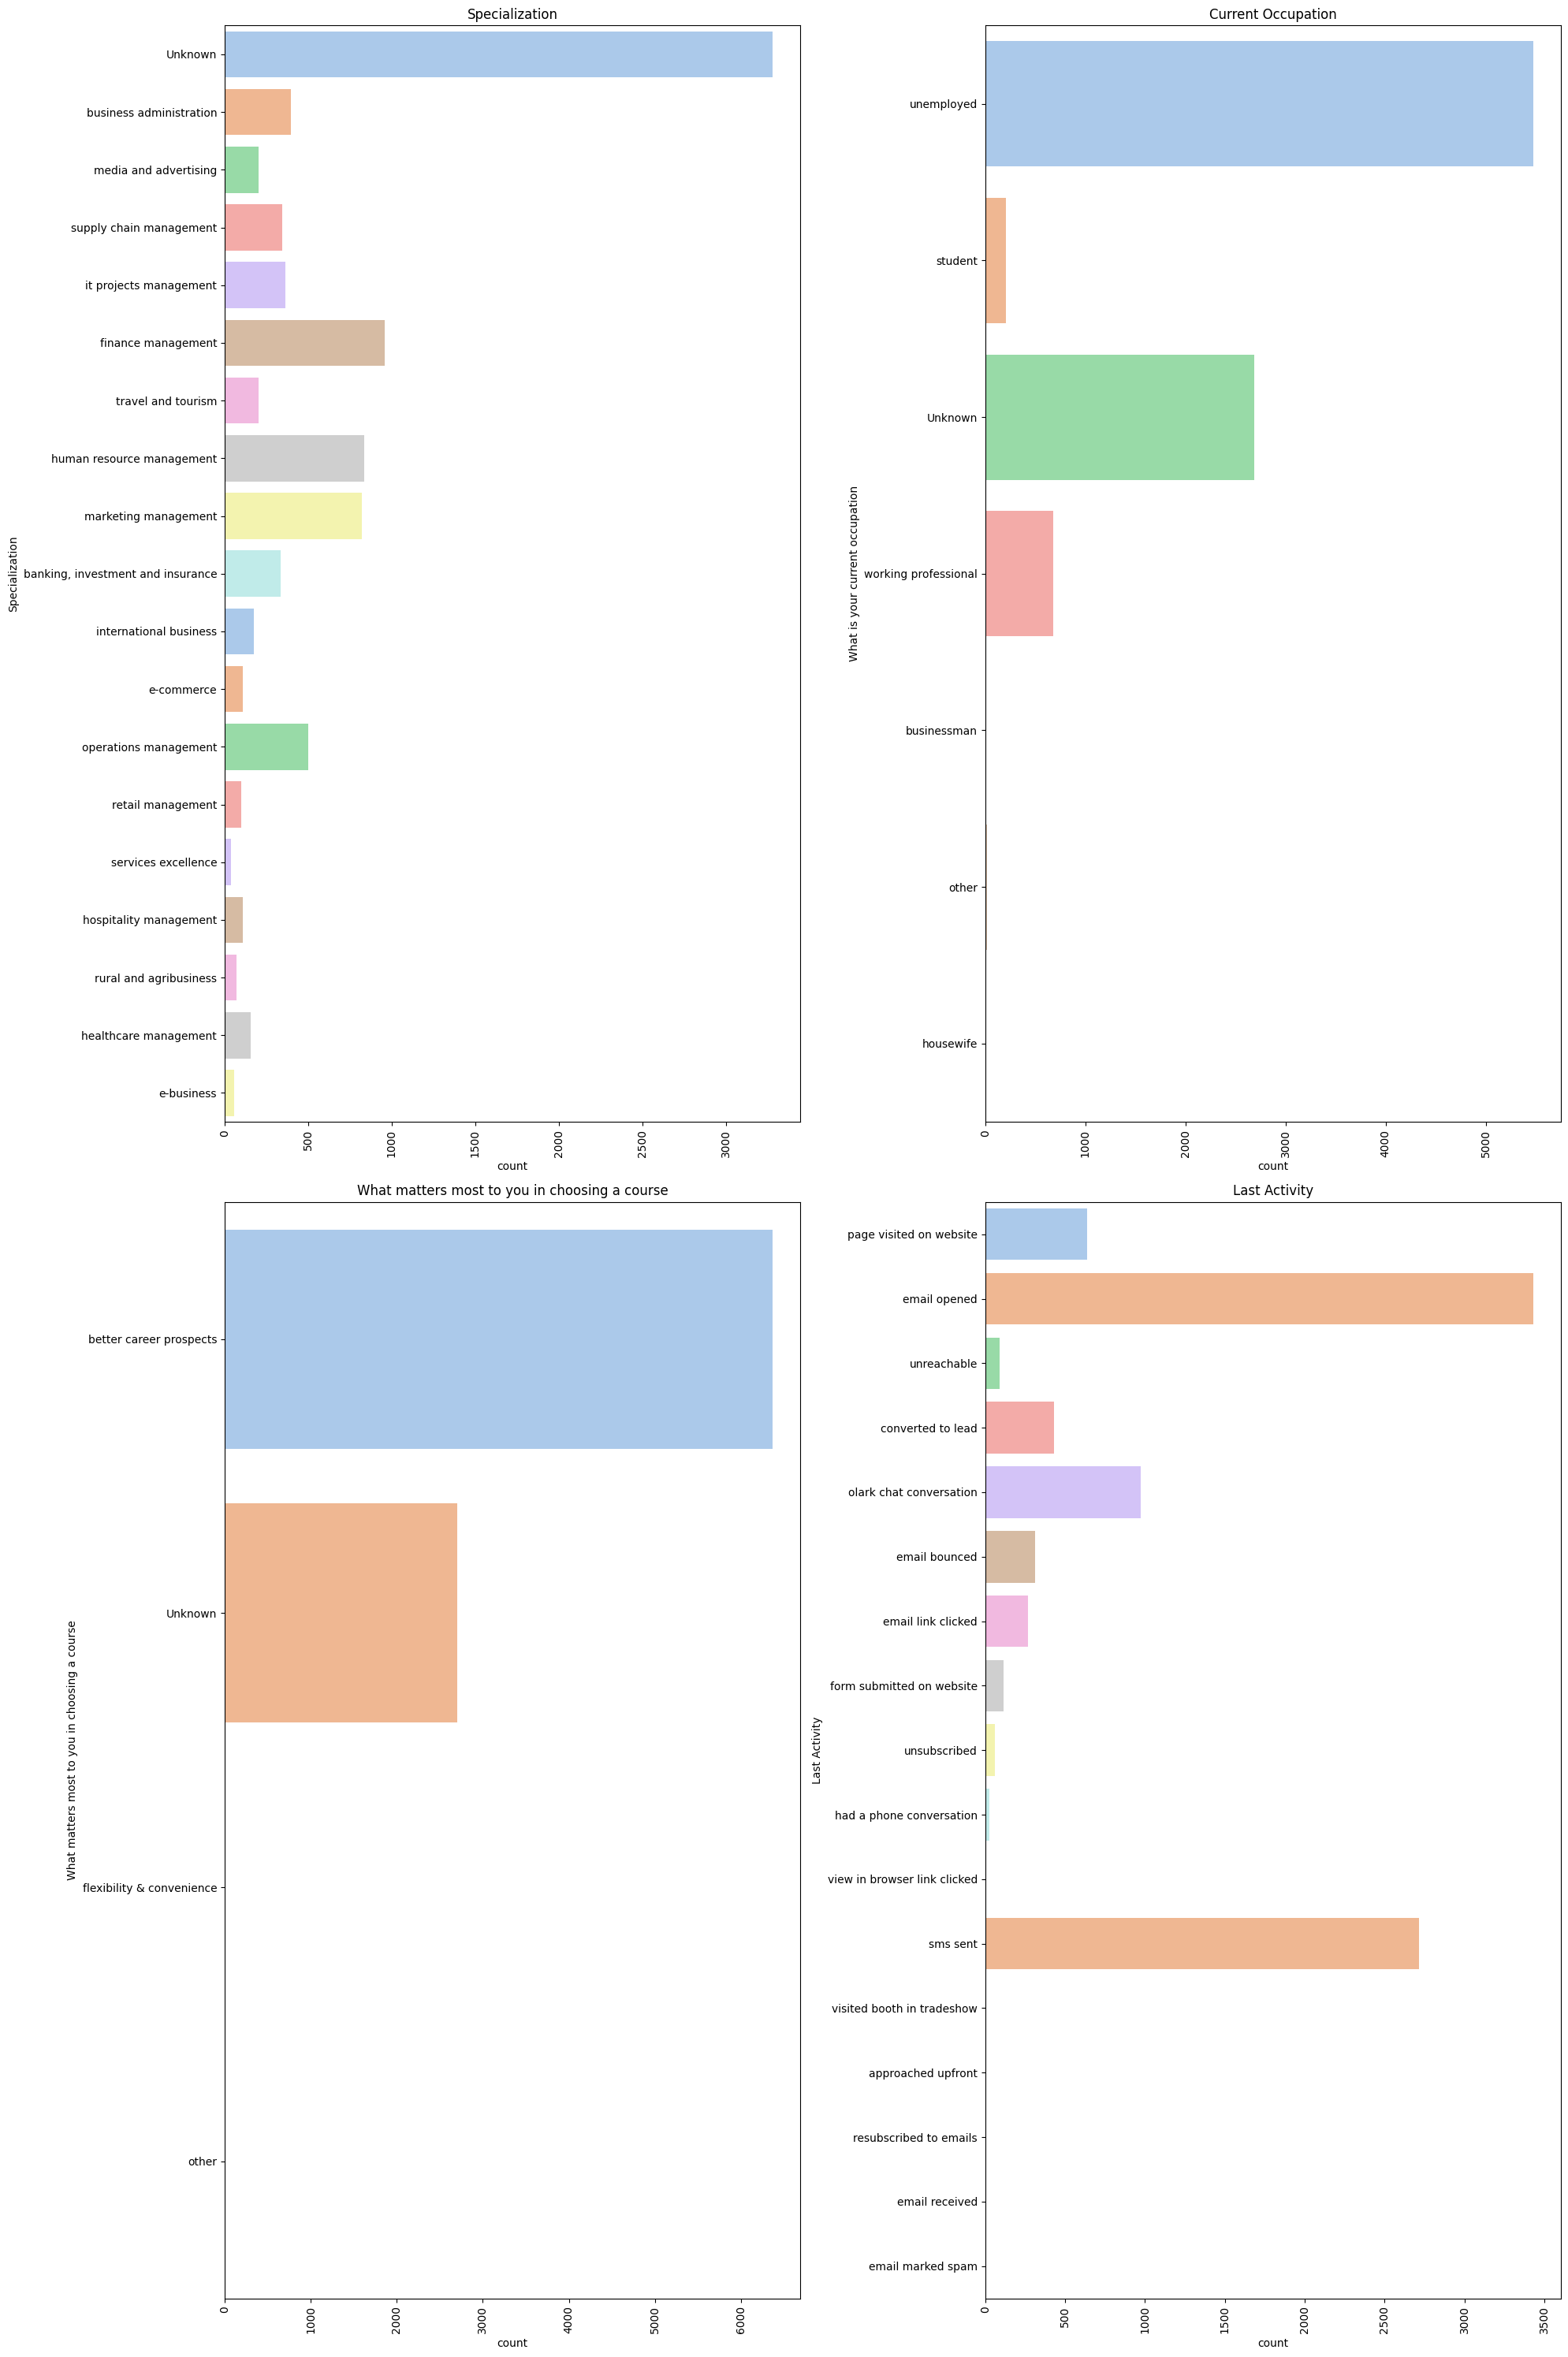

In [36]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(data=lead,y=lead['Specialization'],palette='pastel').tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(lead['What is your current occupation'],palette='pastel').tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(lead['What matters most to you in choosing a course'],palette='pastel').tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(lead['Last Activity'],palette='pastel').tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.tight_layout()
plt.show()

### **3.1.2: Numerical Variables**

In [37]:
#what numerical columns are present in the dataset
num_col=lead.describe().columns
num_col

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Index'],
      dtype='object')

We know Converted column has boolean values. So excluding this.

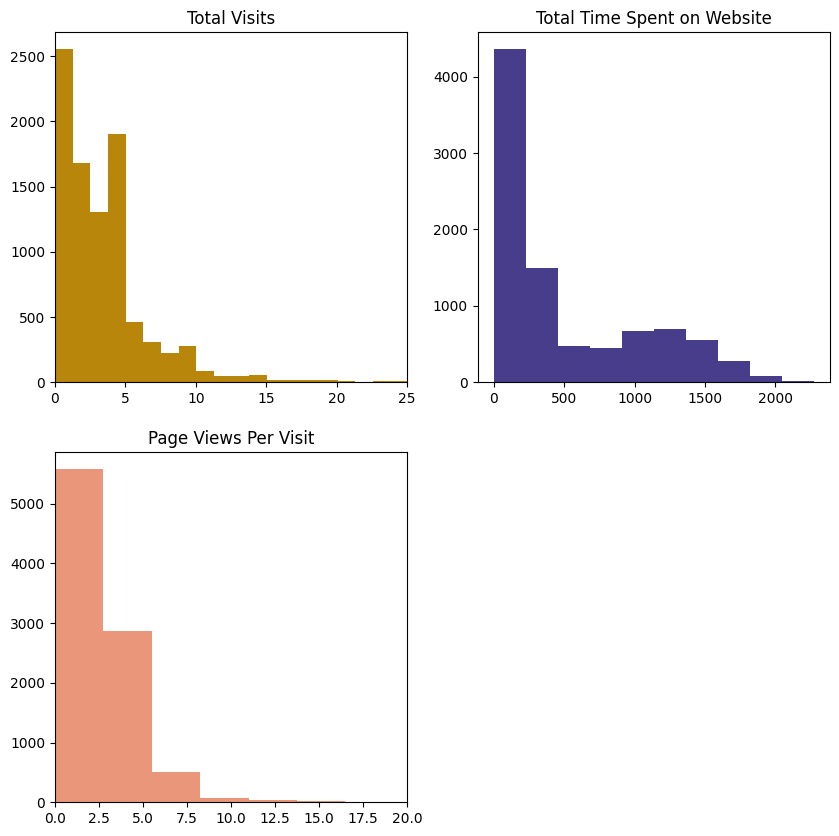

In [38]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(lead['TotalVisits'], bins = 200, color='darkgoldenrod')
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(lead['Total Time Spent on Website'], bins = 10, color='darkslateblue')
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(lead['Page Views Per Visit'], bins = 20, color='darksalmon')
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

## **3.1.3: Relation of Categorical columns with Target variable "Converted"**

In [39]:
#all the categorcial columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City',
       'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [40]:
lead["Lead Origin"].value_counts()

Lead Origin
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: count, dtype: int64

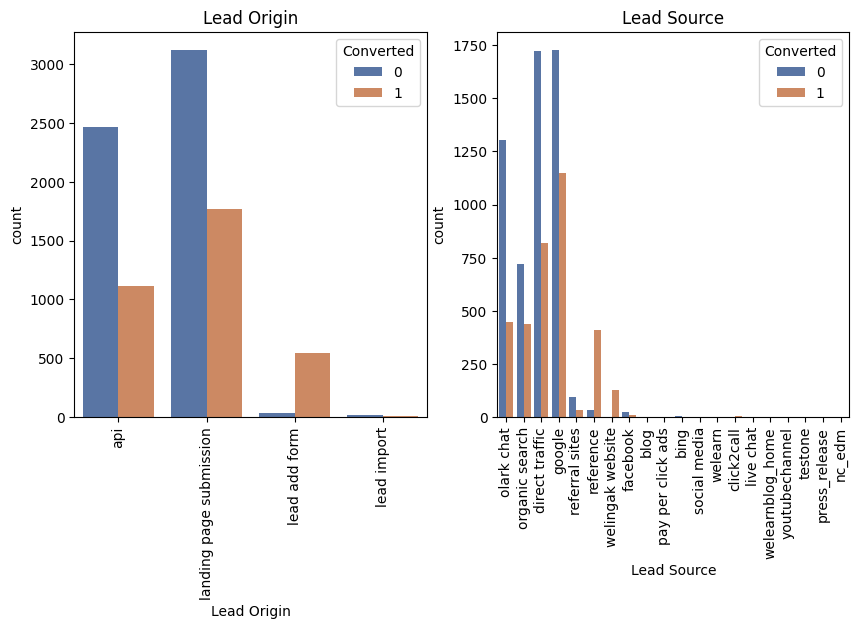

In [41]:
#For ease of analyis doing bifurcation in pairs
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead, palette='deep').tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead,palette='deep').tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

**From the above figures we see the below pointers:**
1. There is a high non conversion rate when the lead was identified through Landing Page submission.
2. In terms of lead source organic search, google and olark chart are leading categories.

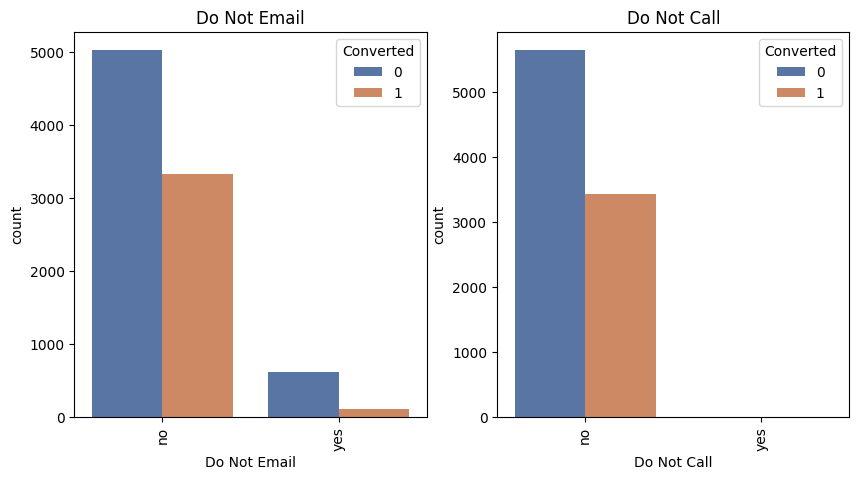

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead, palette='deep').tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead, palette='deep').tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

This indicates people that leads that don't want to be contacted have very high chance of not being converted into Leads this suggests lead is not interested in undertaking the course.

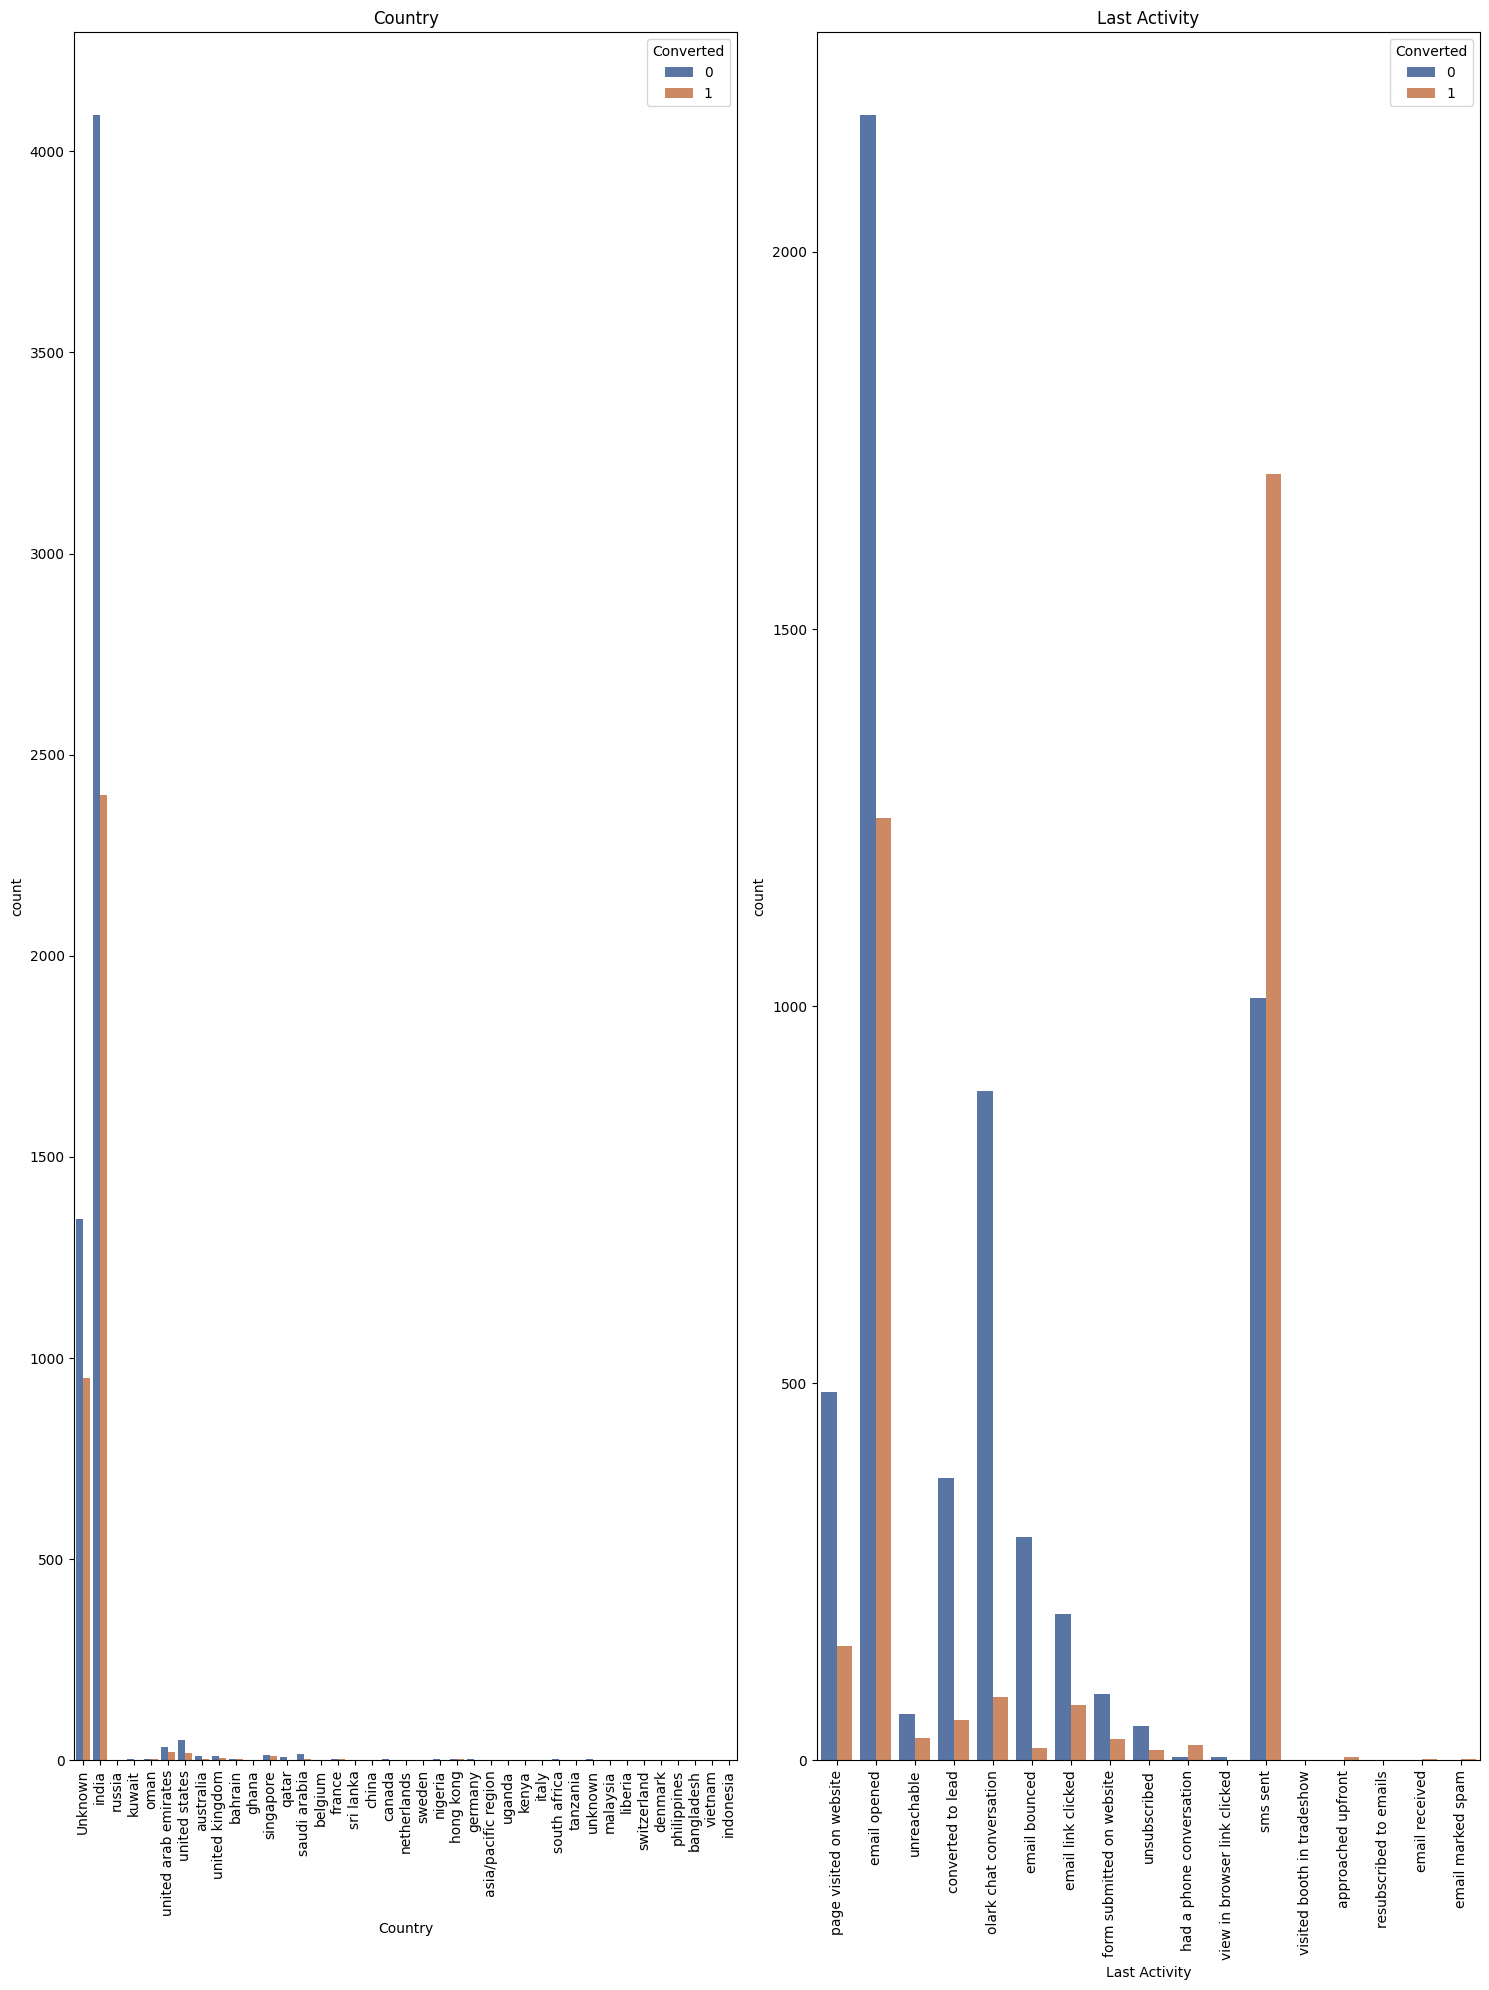

In [43]:
plt.figure(figsize = (15,20))

plt.subplot(1,2,1)
sns.countplot(x='Country', hue='Converted', data= lead, palette='deep').tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(1,2,2)
sns.countplot(x='Last Activity', hue='Converted', data= lead, palette='deep').tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.tight_layout()
plt.show()

**From the above figures we can make below inferences:**
1. India is the country where we see the highest conversion and non-conversion rate. This suggests that marketing team for X education can target the country India to enroll more leads and increase revenue.
2. On the other hand based on the last activity we see leads who have opened the email have high chances of both getting converted into a lead or not a lead. Followed by leads who have olark chat conversation have high chance of gettign converted.

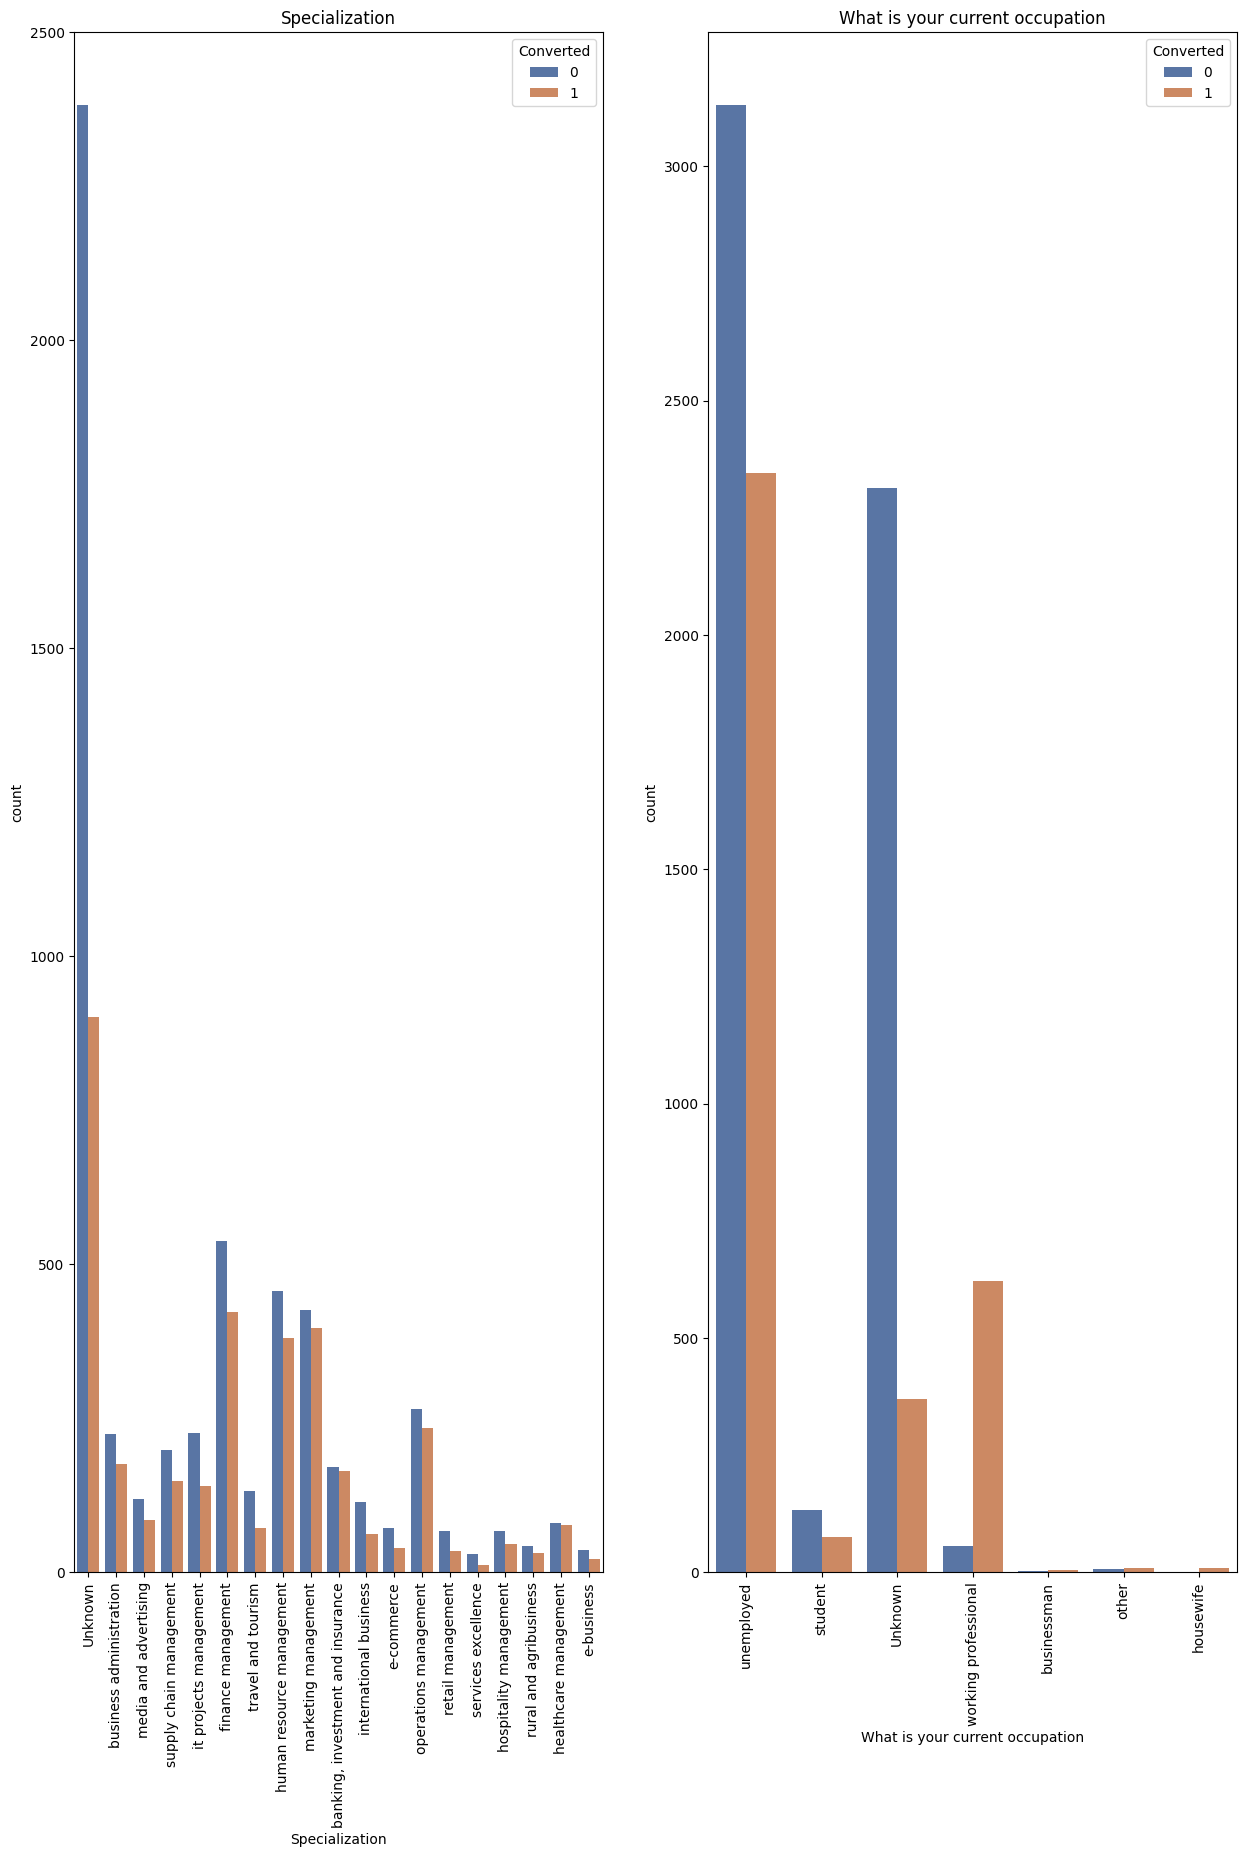

In [44]:
plt.figure(figsize = (15,20))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data=lead, palette='deep').tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data=lead, palette='deep').tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

**From the above figures we can make the below inferences:**
1. People with background in finance and HR department have high chances of getting converted as leads and non-conversion rate as well.
2. On the other hand we can see that people who are currently unemployed high chance to be a lead and people who are working professional have very low chances of being a lead considering people who are working might not enroll into the course because of time constraint.

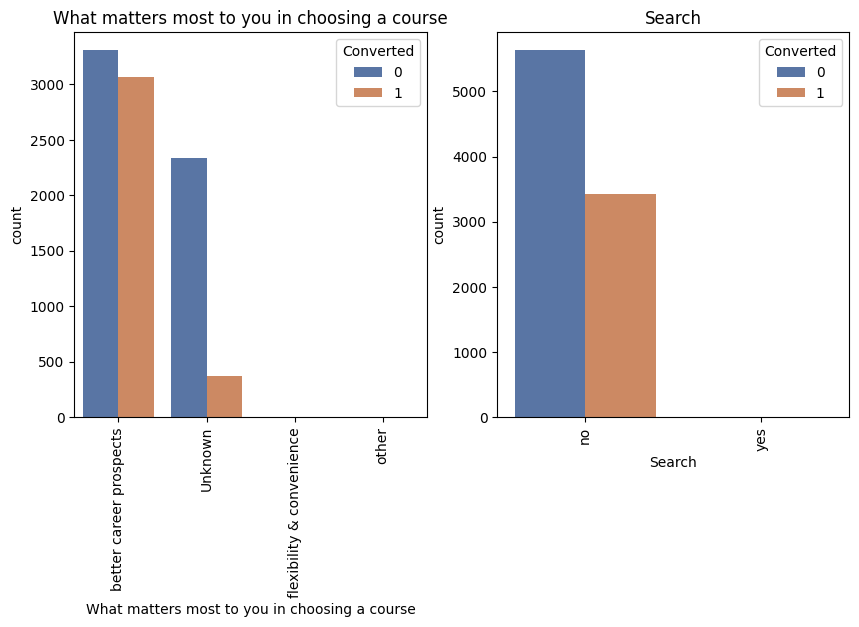

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=lead, palette='deep').tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead, palette='deep').tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

One clear inference is there is high chance of converting a potential lead into hot lead who want to change career or have better career prospects.

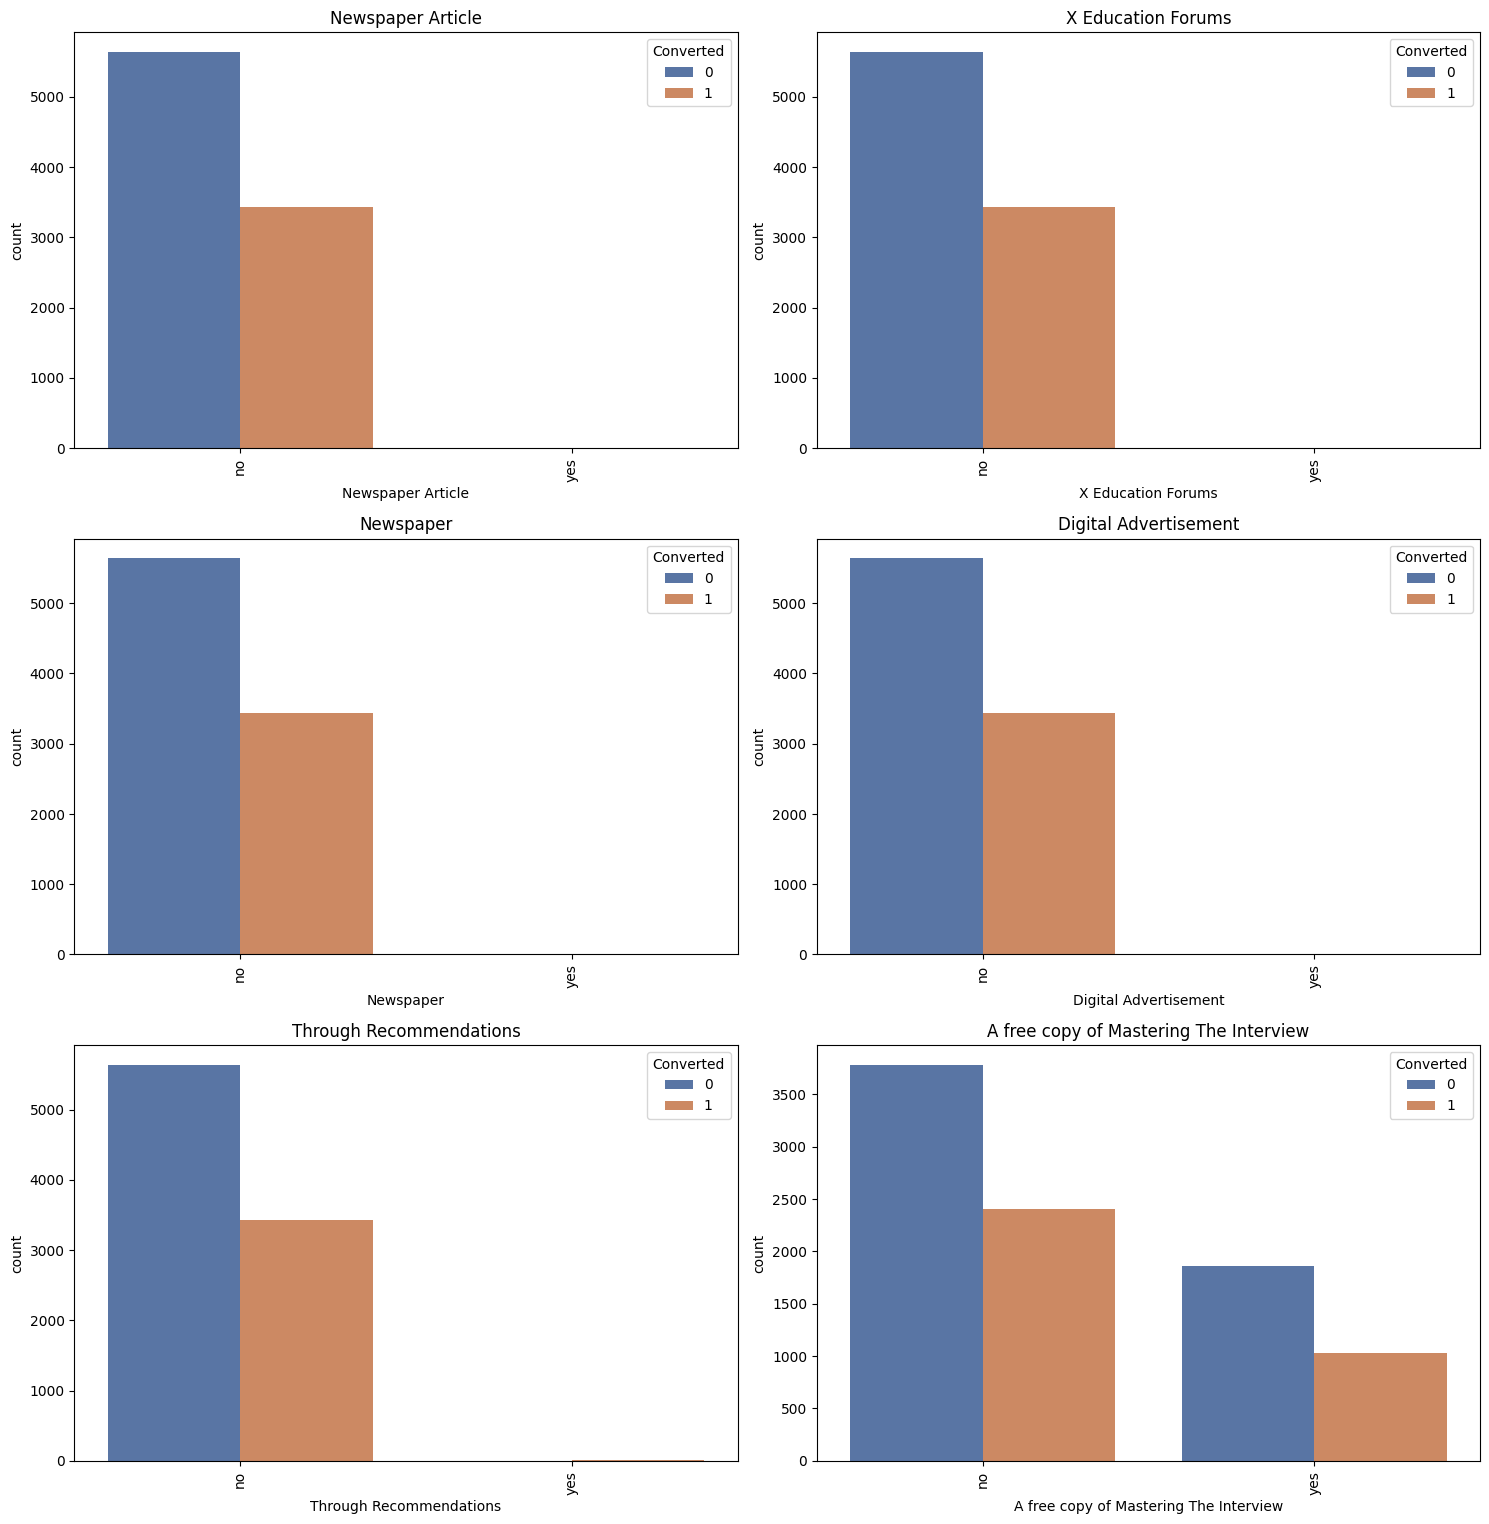

In [46]:
plt.figure(figsize = (15,30))

plt.subplot(6,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead, palette='deep').tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(6,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead,palette='deep').tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(6,2,3)
sns.countplot(x='Newspaper', hue='Converted', data= lead,palette='deep').tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(6,2,4)
sns.countplot(x='Digital Advertisement', hue='Converted', data=lead,palette='deep').tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(6,2,5)
sns.countplot(x='Through Recommendations', hue='Converted', data=lead,palette='deep' ).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(6,2,6)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=lead,palette='deep').tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')


plt.tight_layout()
plt.show()

**Inferences from the above figures:**

Potential leds who have seen ads about the X Education from Newspaper, Newspaper article and through recommendations have high chance of getting converted into a potential lead.

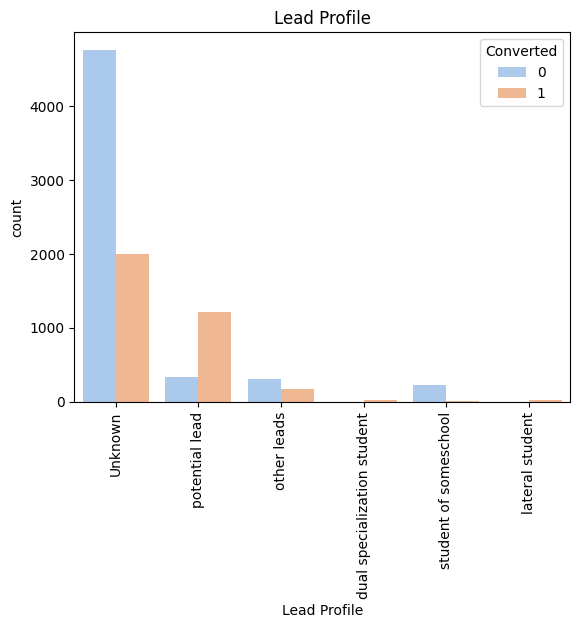

In [47]:
#checking for our last categorical column
sns.countplot(x='Lead Profile', hue='Converted', data=lead, palette='pastel').tick_params(axis='x', rotation = 90)
plt.title('Lead Profile')
plt.show()

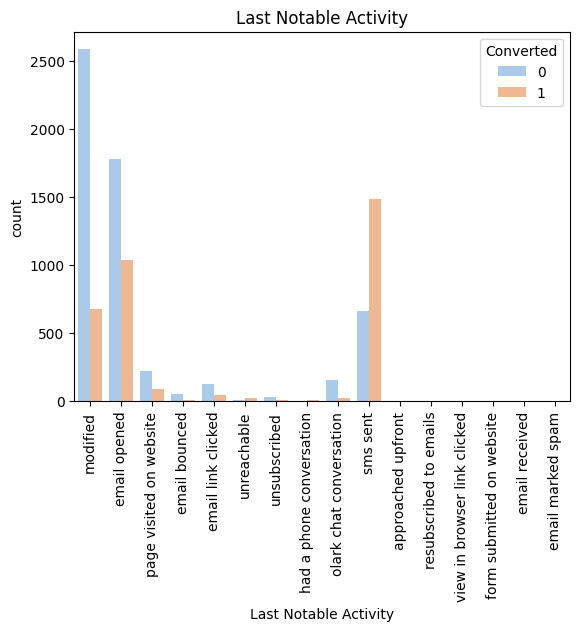

In [48]:
#checking for our last categorical column
sns.countplot(x='Last Notable Activity', hue='Converted', data=lead, palette='pastel').tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

Leads who have modified or have opened the email have potential to get converted into hot leads while we have noticed poeple whose last activity is sms sent have high chance of getting converted into a lead.

Checking correlation about Numerical variables through heatmap

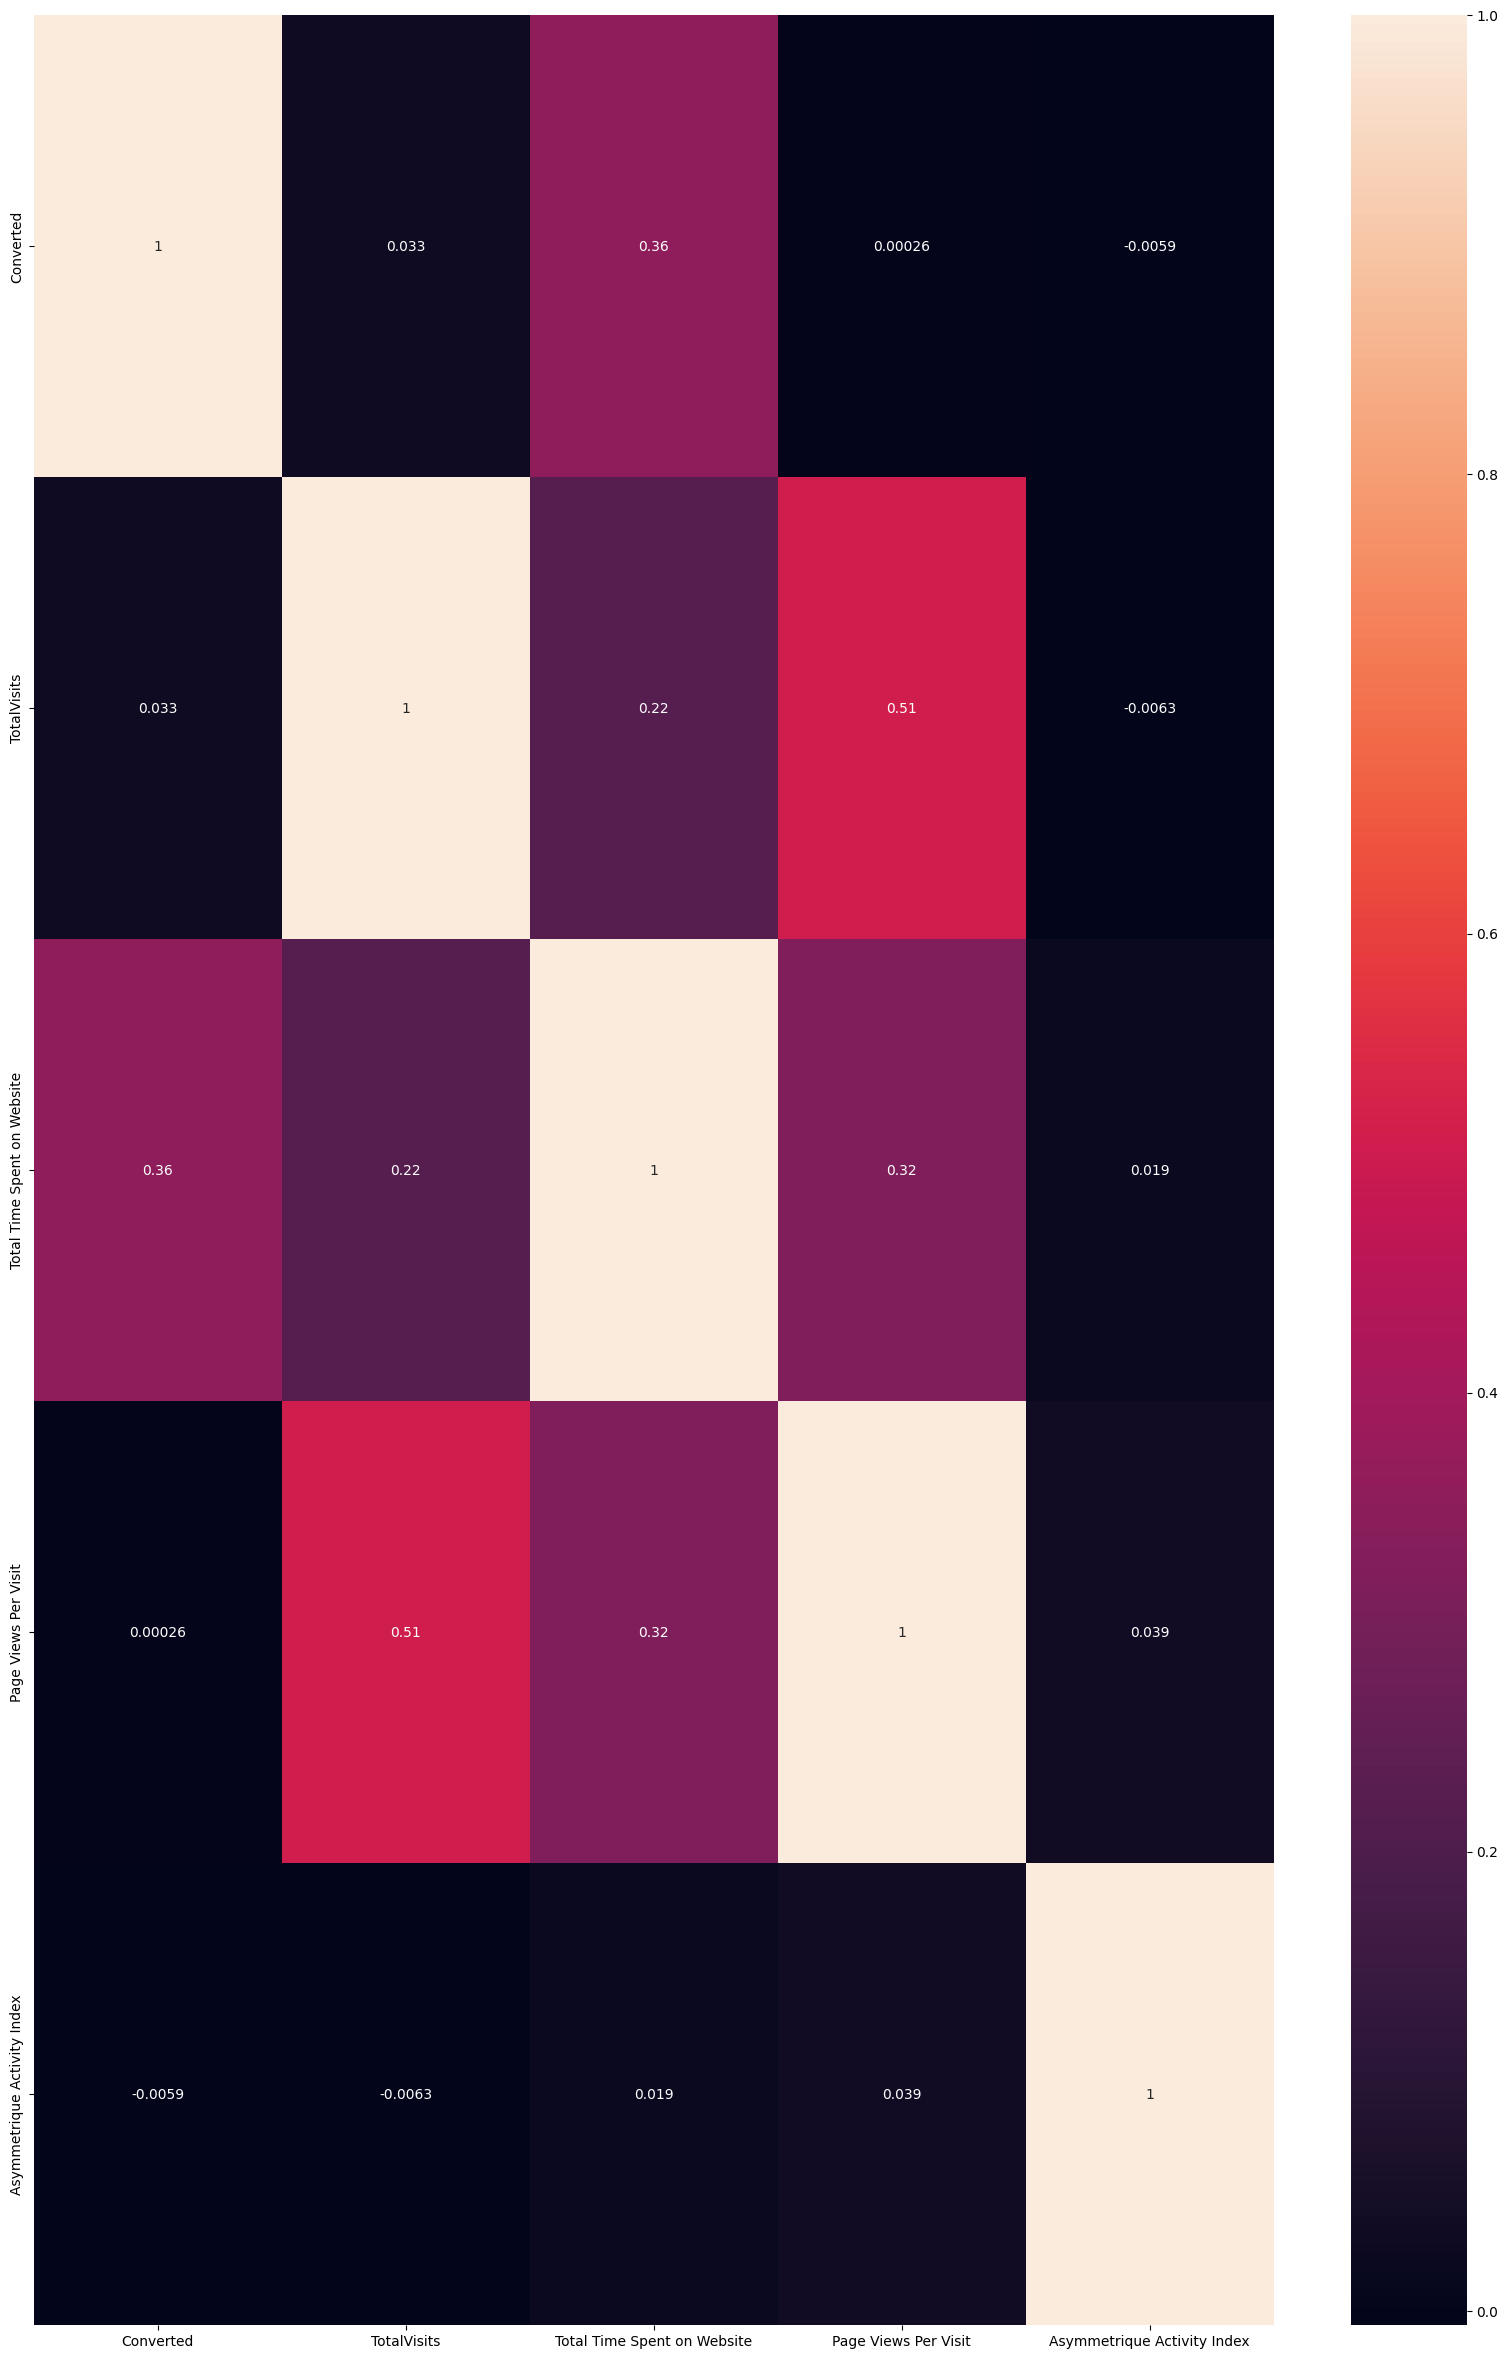

In [49]:
#creating a heatmap to check the correlations
plt.figure(figsize=(20,30))

#selecting only numerical columns for correlation calculation
numerical_col=lead.select_dtypes(include=['float','int'])
sns.heatmap(numerical_col.corr(),annot=True)
plt.show()

In [50]:
#checking the basic statistical information for numerical columns
numeric = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


# **Step 4: Label Encoding Categorical variables**

Since we have a lot of categorical variables which have many categories creating dummy variables will increase the variable by a humongous amount.

So we will use Label Encoding technique to convert these categorical variables to numerical form so that our algorithms can work with the data.

**In label encoding, each unique category value is assigned with an integer.**


In [51]:
#list of categorical columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City',
       'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [52]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
label_mappings = {}

for col in cat_col:
    lead[col]=label_encoder.fit_transform(lead[col])
    label_mappings[col] = label_encoder.classes_
lead.shape

(9074, 32)

In [53]:
#checking the data now
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,8,0,0,0,0.0,0,0.0,10,0,0,0,5,1,0,0,0,0,0,0,0,0,10,2,0,0,0,0,2,0,0,8
1,0,9,0,0,0,5.0,674,2.5,5,13,0,0,5,1,0,0,0,0,0,0,0,0,19,0,0,0,0,0,2,0,0,4
2,1,3,0,0,1,2.0,1532,2.0,5,13,2,0,4,1,0,0,0,0,0,0,0,0,25,3,0,0,4,1,2,0,1,4
3,1,3,0,0,0,1.0,305,1.0,13,13,12,9,5,1,0,0,0,0,0,0,0,0,19,4,0,0,0,1,2,0,0,8
4,1,5,0,0,1,2.0,1428,1.0,1,13,0,5,5,1,0,0,0,0,0,0,0,0,25,3,0,0,0,1,2,0,0,8


In [54]:
#checking how many labels have being created for each column
for col, labels in label_mappings.items():
    print(f"Column '{col}': {list(labels)}")

Column 'Lead Origin': ['api', 'landing page submission', 'lead add form', 'lead import']
Column 'Lead Source': ['bing', 'blog', 'click2call', 'direct traffic', 'facebook', 'google', 'live chat', 'nc_edm', 'olark chat', 'organic search', 'pay per click ads', 'press_release', 'reference', 'referral sites', 'social media', 'testone', 'welearn', 'welearnblog_home', 'welingak website', 'youtubechannel']
Column 'Do Not Email': ['no', 'yes']
Column 'Do Not Call': ['no', 'yes']
Column 'Last Activity': ['approached upfront', 'converted to lead', 'email bounced', 'email link clicked', 'email marked spam', 'email opened', 'email received', 'form submitted on website', 'had a phone conversation', 'olark chat conversation', 'page visited on website', 'resubscribed to emails', 'sms sent', 'unreachable', 'unsubscribed', 'view in browser link clicked', 'visited booth in tradeshow']
Column 'Country': ['Unknown', 'asia/pacific region', 'australia', 'bahrain', 'bangladesh', 'belgium', 'canada', 'china', 

In [55]:
#checking the data now
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,8,0,0,0,0.0,0,0.0,10,0,0,0,5,1,0,0,0,0,0,0,0,0,10,2,0,0,0,0,2,0,0,8
1,0,9,0,0,0,5.0,674,2.5,5,13,0,0,5,1,0,0,0,0,0,0,0,0,19,0,0,0,0,0,2,0,0,4
2,1,3,0,0,1,2.0,1532,2.0,5,13,2,0,4,1,0,0,0,0,0,0,0,0,25,3,0,0,4,1,2,0,1,4
3,1,3,0,0,0,1.0,305,1.0,13,13,12,9,5,1,0,0,0,0,0,0,0,0,19,4,0,0,0,1,2,0,0,8
4,1,5,0,0,1,2.0,1428,1.0,1,13,0,5,5,1,0,0,0,0,0,0,0,0,25,3,0,0,0,1,2,0,0,8


# **Step 5: Splitting the data Training-Testing**

In [56]:
#importing the library for splitting the data
from sklearn.model_selection import train_test_split

In [57]:
#Dropping the target variable
X=lead.drop("Converted",axis=1)
X.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,8,0,0,0.0,0,0.0,10,0,0,0,5,1,0,0,0,0,0,0,0,0,10,2,0,0,0,0,2,0,0,8
1,0,9,0,0,5.0,674,2.5,5,13,0,0,5,1,0,0,0,0,0,0,0,0,19,0,0,0,0,0,2,0,0,4
2,1,3,0,0,2.0,1532,2.0,5,13,2,0,4,1,0,0,0,0,0,0,0,0,25,3,0,0,4,1,2,0,1,4
3,1,3,0,0,1.0,305,1.0,13,13,12,9,5,1,0,0,0,0,0,0,0,0,19,4,0,0,0,1,2,0,0,8
4,1,5,0,0,2.0,1428,1.0,1,13,0,5,5,1,0,0,0,0,0,0,0,0,25,3,0,0,0,1,2,0,0,8


In [58]:
#our target variable
y=lead["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
#spltting the data now
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [60]:
#checking the data types of the columns
X_train.dtypes

Lead Origin                                        int64
Lead Source                                        int64
Do Not Email                                       int64
Do Not Call                                        int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                      int64
Country                                            int64
Specialization                                     int64
How did you hear about X Education                 int64
What is your current occupation                    int64
What matters most to you in choosing a course      int64
Search                                             int64
Magazine                                           int64
Newspaper Article                                  int64
X Education Forums                                 int64
Newspaper                      

In [61]:
#before proceeding with model building we need to also make sure our numerical columns are standardized so we can have scaled values and every feature will have same importance
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
3009,1,3,0,0,0.007968,0.178347,0.083333,5,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,1,4
1012,1,3,1,0,0.007968,0.085355,0.083333,2,13,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1
9226,0,8,0,0,0.000000,0.000000,0.000000,12,0,0,0,5,1,0,0,0,0,0,0,0,0,19,4,0,0,0,0,1,0,0,8
4750,1,3,0,0,0.007968,0.619946,0.083333,12,13,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,12
7987,1,3,0,0,0.019920,0.711590,0.104167,12,13,5,9,5,1,0,0,0,0,0,0,0,0,13,4,0,0,0,3,2,0,0,8


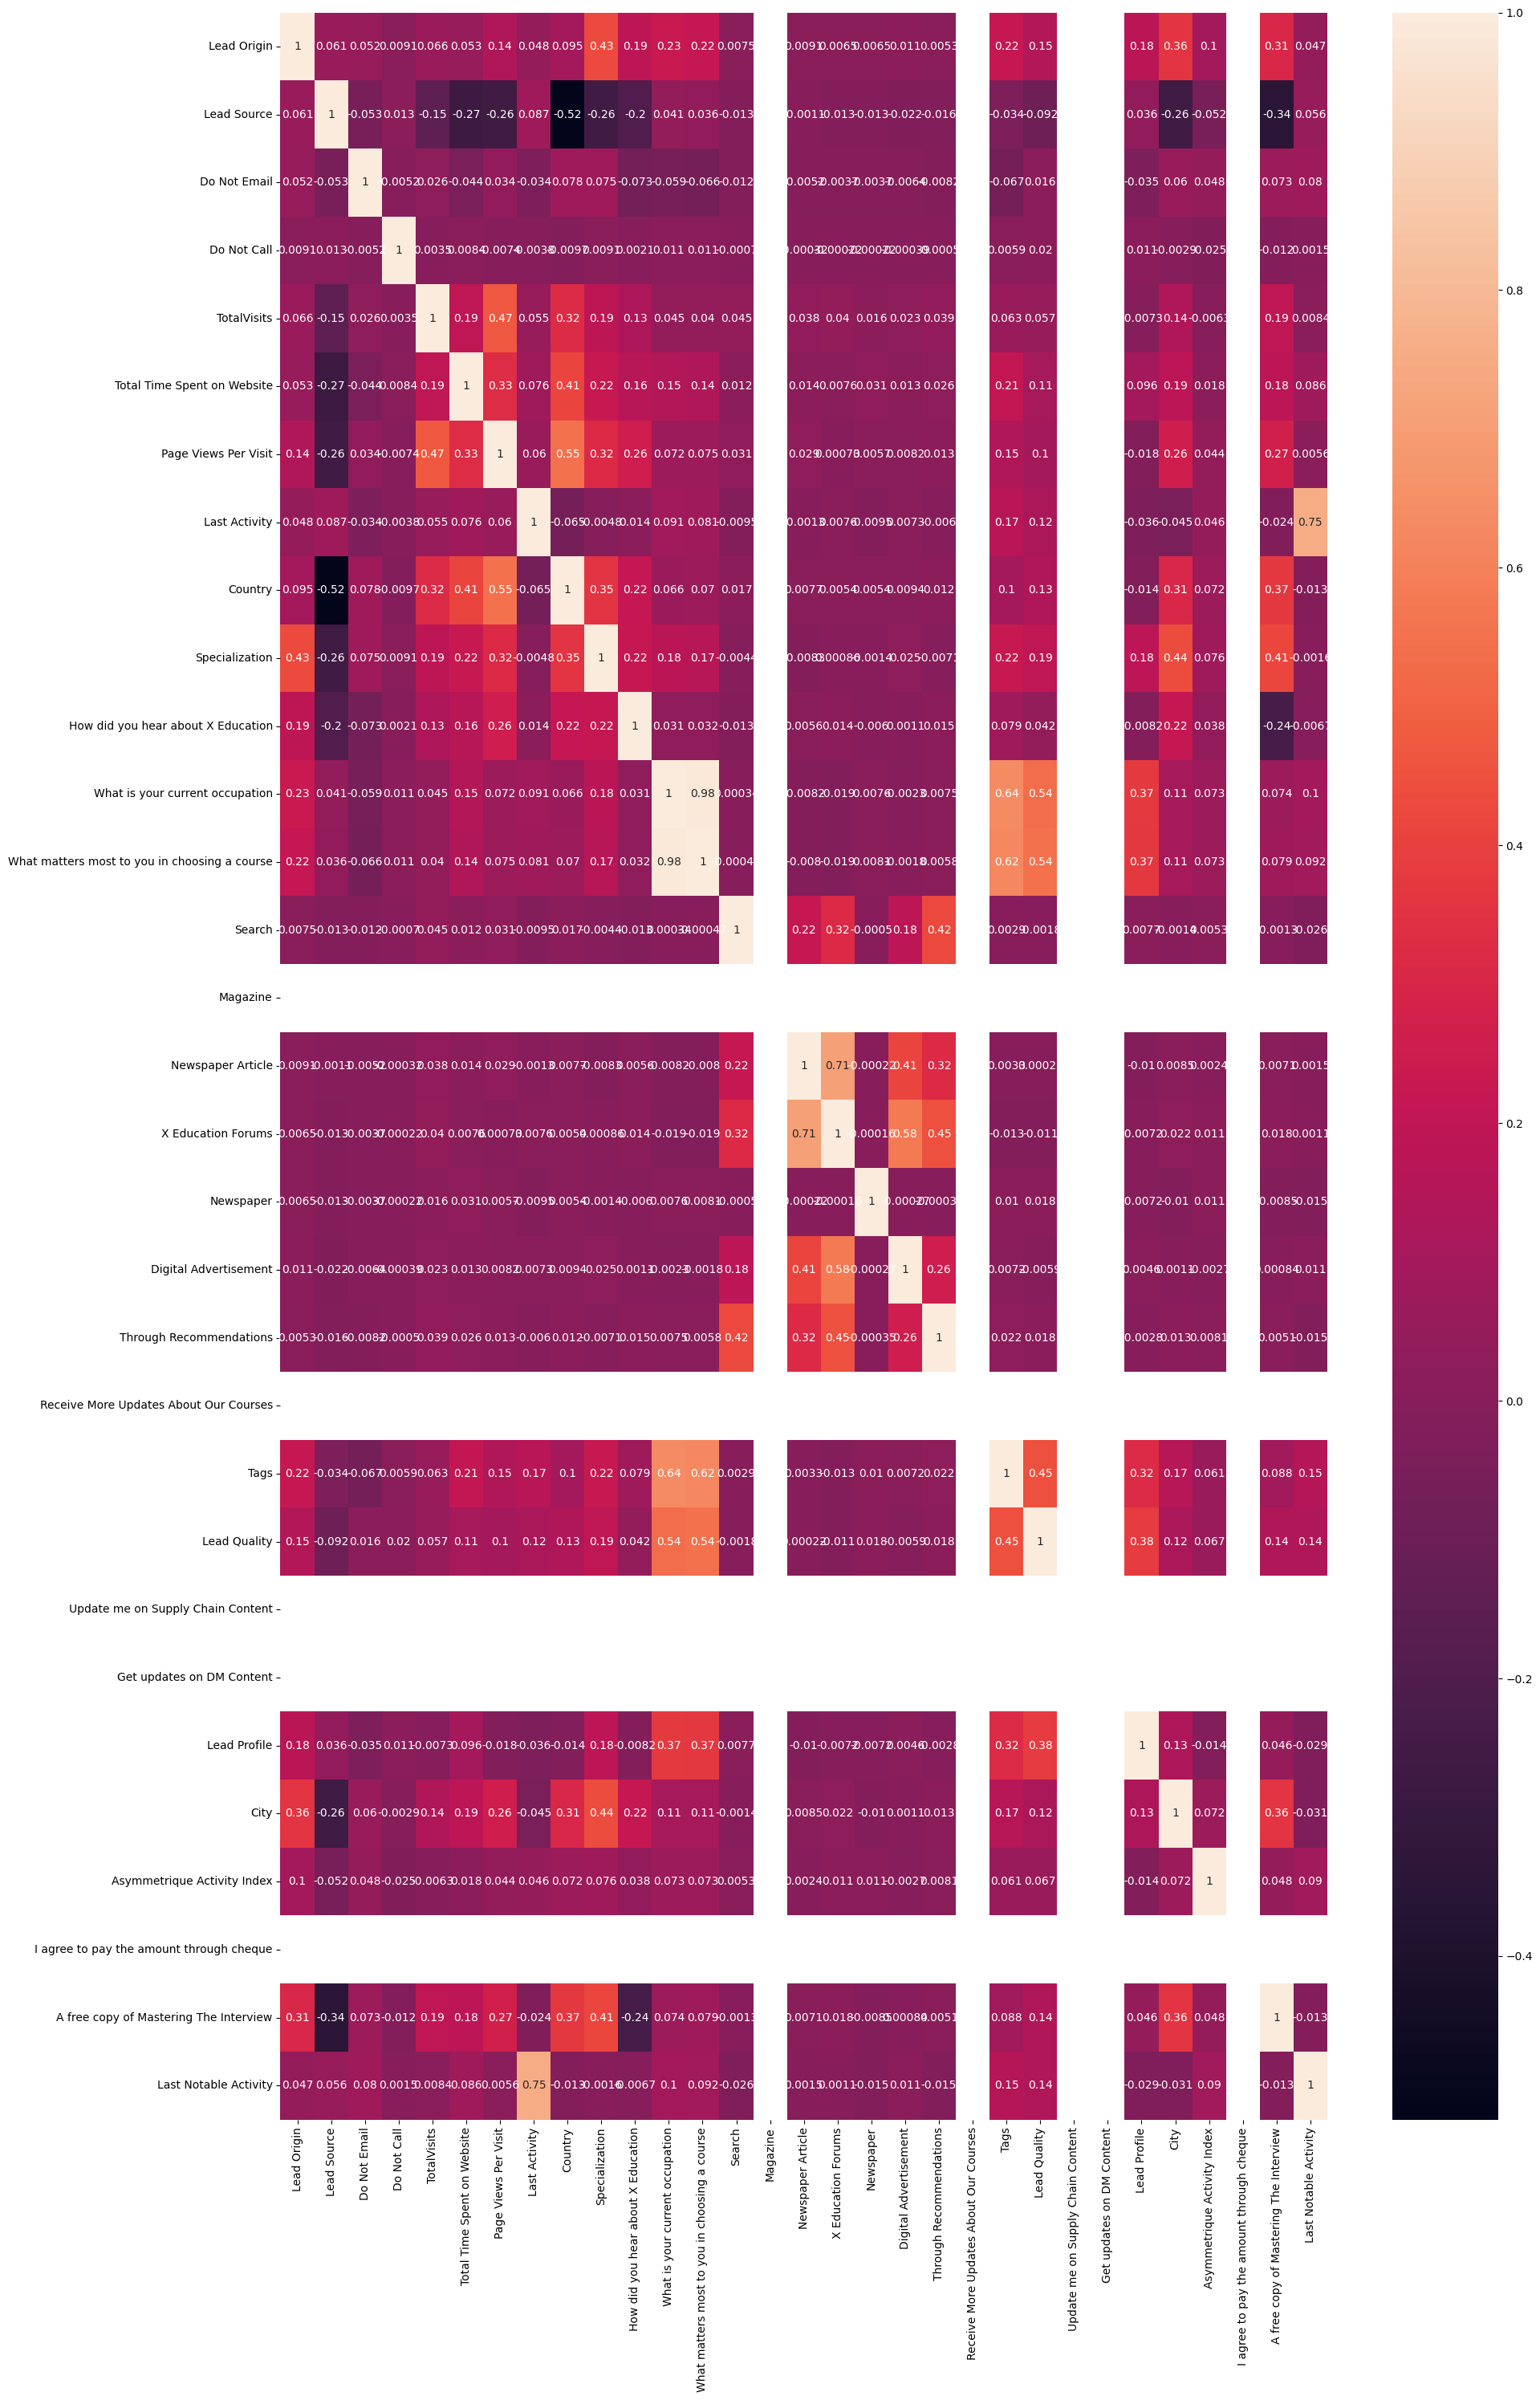

In [62]:
#checking the correlation between variables
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(),annot=True)
plt.tight_layout()
plt.show()

# **Step 6: Model Building**

In [63]:
#since we will be using Logistic Regression to build the model importing the module
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()

For the feature selection we will be using Recursive Feature Elimination

**RFE**: Recurcive Feature Elimination Feature ranking method. An external eliminator is used that assigns weight to the features.

In [64]:
#importing the model for RFE
from sklearn.feature_selection import RFE

rfe=RFE(LogReg,n_features_to_select=20)
rfe=rfe.fit(X_train, y_train)

In [65]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', True, 1),
 ('Specialization', False, 7),
 ('How did you hear about X Education', False, 6),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Search', False, 4),
 ('Magazine', False, 11),
 ('Newspaper Article', False, 3),
 ('X Education Forums', False, 5),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 2),
 ('Receive More Updates About Our Courses', False, 8),
 ('Tags', True, 1),
 ('Lead Quality', True, 1),
 ('Update me on Supply Chain Content', False, 9),
 ('Get updates on DM Content', False, 10),
 ('Lead Profile', True, 1),
 ('City', True, 1),
 ('Asymmetrique Activity Index', True, 1),
 ('I agree to pay the amount through

In [66]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation', 'What matters most to you in choosing a course',
       'Newspaper', 'Digital Advertisement', 'Tags', 'Lead Quality', 'Lead Profile', 'City',
       'Asymmetrique Activity Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [67]:
#features that were not selected by RFE
X_train.columns[~rfe.support_]

Index(['Specialization', 'How did you hear about X Education', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'I agree to pay the amount through cheque'],
      dtype='object')

In [68]:
#putting the columns for X_train that were seleted by RFE
X_train=X_train[col]
X_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Newspaper,Digital Advertisement,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,A free copy of Mastering The Interview,Last Notable Activity
3009,1,3,0,0,0.007968,0.178347,0.083333,5,13,0,0,0,0,0,0,0,1,3,1,4
1012,1,3,1,0,0.007968,0.085355,0.083333,2,13,6,0,0,0,0,0,0,1,2,0,1
9226,0,8,0,0,0.000000,0.000000,0.000000,12,0,5,1,0,0,19,4,0,0,1,0,8
4750,1,3,0,0,0.007968,0.619946,0.083333,12,13,0,0,0,0,0,0,0,2,3,0,12
7987,1,3,0,0,0.019920,0.711590,0.104167,12,13,5,1,0,0,13,4,0,3,2,0,8


**6.1 Building our first regression model**

In [69]:
#importing the statsmodels
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train[col])

logmodel1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res1=logmodel1.fit()
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2706.5
Date:                Tue, 23 Jul 2024   Deviance:                       5413.0
Time:                        15:52:40   Pearson chi2:                 6.49e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3817
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Columns that have high p-values:**
1. Do not Call
2. TotalVisits
3. Newspapar
4. Digital Advertisement
5. City
6. Asymmetrique Activity Index


In [70]:
X_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Newspaper,Digital Advertisement,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,A free copy of Mastering The Interview,Last Notable Activity
3009,1,3,0,0,0.007968,0.178347,0.083333,5,13,0,0,0,0,0,0,0,1,3,1,4
1012,1,3,1,0,0.007968,0.085355,0.083333,2,13,6,0,0,0,0,0,0,1,2,0,1
9226,0,8,0,0,0.000000,0.000000,0.000000,12,0,5,1,0,0,19,4,0,0,1,0,8
4750,1,3,0,0,0.007968,0.619946,0.083333,12,13,0,0,0,0,0,0,0,2,3,0,12
7987,1,3,0,0,0.019920,0.711590,0.104167,12,13,5,1,0,0,13,4,0,3,2,0,8


In [71]:
#Getting the predicted values on the training data set
y_train_pred=res1.predict(sm.add_constant(X_train))
y_train_pred[:10]

3009    0.041871
1012    0.140114
9226    0.387425
4750    0.601163
7987    0.795853
1281    0.833961
2880    0.030080
4971    0.509893
7536    0.939850
1248    0.902844
dtype: float64

In [72]:
#reshaping the values into an array
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04187089, 0.14011426, 0.38742546, 0.60116285, 0.79585288,
       0.83396112, 0.03007957, 0.50989336, 0.93985025, 0.90284366])

In [73]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['ID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ID
0,0,0.041871,3009
1,0,0.140114,1012
2,0,0.387425,9226
3,1,0.601163,4750
4,1,0.795853,7987


In [74]:
y_train_pred_final['predicted']=y_train_pred_final.Converted_prob.apply(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted
0,0,0.041871,3009,0
1,0,0.140114,1012,0
2,0,0.387425,9226,0
3,1,0.601163,4750,1
4,1,0.795853,7987,1


In [75]:
#importing the metrics
from sklearn import metrics

#making the confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
confusion

array([[3422,  483],
       [ 747, 1699]])

In [76]:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.8063297118564006


From the initial model standpoint, we have a very good accuracy of around 80%.

But up next we should check the VIF values as well since we are dealing with multiple columns and variables might have multicollinearity between them.

In [77]:
#importing VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

#making a VIF dataframe for all the variables present in the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation,103.58
10,What matters most to you in choosing a course,102.19
19,Last Notable Activity,16.56
7,Last Activity,13.53
17,Asymmetrique Activity Index,9.90
8,Country,5.96
1,Lead Source,5.41
6,Page Views Per Visit,3.98
13,Tags,3.69
0,Lead Origin,3.02


Now these are some really high p-values. We have two variables that have really high VIF values:
1. What is your current occupation
2. What matters to you the most while choosing course

But these variables have really significant p-values that is around 0.00.

But VIF indicicates that multicollinearity might be present in the variables. So we will first try to drop the high p-value variable.

In [78]:
#dropping the column Do not call
X_train.drop('Do Not Call',axis=1,inplace=True)

In [79]:
#checking the columns now
X_train.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Newspaper', 'Digital Advertisement',
       'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**6.2: Model 2 without Dot not Call fetature**

In [80]:
#second model
logmodel2=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
res2=logmodel2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2707.1
Date:                Tue, 23 Jul 2024   Deviance:                       5414.3
Time:                        15:52:40   Pearson chi2:                 6.50e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3816
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [81]:
#checking the VIF for this model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation,103.58
9,What matters most to you in choosing a course,102.18
18,Last Notable Activity,16.56
6,Last Activity,13.53
16,Asymmetrique Activity Index,9.90
7,Country,5.96
1,Lead Source,5.41
5,Page Views Per Visit,3.98
12,Tags,3.69
0,Lead Origin,3.02


We see that after dropping the "Do not call" variable we hvae not seen any signifcant change in VIF of the variables
1. What is your current occupation
2. What matters to you the most while choosing course

For next model, let's try dropping the variable What is your current occupation and check the results.

**6.3: Model without What is your current occupation variable**

In [82]:
#dropping the column
X_train.drop("What is your current occupation",axis=1,inplace=True)

In [83]:
#creating the model again
logmodel3=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
res3=logmodel3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.8
Date:                Tue, 23 Jul 2024   Deviance:                       5463.5
Time:                        15:52:41   Pearson chi2:                 6.52e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3767
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [84]:
#checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Notable Activity,16.54
6,Last Activity,13.53
15,Asymmetrique Activity Index,9.89
8,What matters most to you in choosing a course,6.66
7,Country,5.96
1,Lead Source,5.41
5,Page Views Per Visit,3.98
11,Tags,3.61
0,Lead Origin,3.00
12,Lead Quality,2.75


Now in this model we have seen that p-values did not change much but VIF value for variable: What matters to you most while choosing the course have reduced significantly.

Now we can try to build a model by removing the variable: Newspaper that has high p-value of 0.999.

**6.4: Model without Newspaper feature**

In [85]:
#dropping the model
X_train.drop("Newspaper",axis=1,inplace=True)

In [86]:
#building the model
logmodel4=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
res4=logmodel4.fit()
print(res4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.1
Date:                Tue, 23 Jul 2024   Deviance:                       5466.3
Time:                        15:52:41   Pearson chi2:                 6.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3765
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [87]:
#checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Notable Activity,16.54
6,Last Activity,13.53
14,Asymmetrique Activity Index,9.89
8,What matters most to you in choosing a course,6.66
7,Country,5.96
1,Lead Source,5.41
5,Page Views Per Visit,3.98
10,Tags,3.61
0,Lead Origin,3.00
11,Lead Quality,2.74


No significant change in both p-value and VIF after dropping the Newspaper columns.

Next column we can try to drop can be Digital Advertisement since it has high p-value

**6.5: Model without Digital Advertisment feature**

In [88]:
#dropping the column
X_train.drop("Digital Advertisement",axis=1,inplace=True)

In [89]:
#building the model again
logmodel5=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
res5=logmodel5.fit()
print(res5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.5
Date:                Tue, 23 Jul 2024   Deviance:                       5467.0
Time:                        15:52:42   Pearson chi2:                 6.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3764
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [90]:
#checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity,16.54
6,Last Activity,13.53
13,Asymmetrique Activity Index,9.89
8,What matters most to you in choosing a course,6.66
7,Country,5.96
1,Lead Source,5.41
5,Page Views Per Visit,3.98
9,Tags,3.61
0,Lead Origin,3.00
10,Lead Quality,2.74


Still no major change in VIF but since we still have can try to drop the city variabe.

**6.6: Model without "City" feature**

In [91]:
#dropping the city variable
X_train.drop("City",axis=1,inplace=True)
X_train.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,A free copy of Mastering The Interview,Last Notable Activity
3009,1,3,0,0.007968,0.178347,0.083333,5,13,0,0,0,0,3,1,4
1012,1,3,1,0.007968,0.085355,0.083333,2,13,0,0,0,0,2,0,1
9226,0,8,0,0.000000,0.000000,0.000000,12,0,1,19,4,0,1,0,8
4750,1,3,0,0.007968,0.619946,0.083333,12,13,0,0,0,0,3,0,12
7987,1,3,0,0.019920,0.711590,0.104167,12,13,1,13,4,0,2,0,8


In [92]:
#building the model again
logmodel6=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
res6=logmodel6.fit()
print(res6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2734.0
Date:                Tue, 23 Jul 2024   Deviance:                       5468.0
Time:                        15:52:42   Pearson chi2:                 6.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3763
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Now we are only left with two variables that have high p-value
1. TotalVisits: 0.011
2. Asymmetrique Activity Index

Let's check the VIF values as well

In [93]:
#checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity,16.54
6,Last Activity,13.52
12,Asymmetrique Activity Index,9.80
8,What matters most to you in choosing a course,6.66
7,Country,5.90
1,Lead Source,5.34
5,Page Views Per Visit,3.95
9,Tags,3.59
0,Lead Origin,2.78
10,Lead Quality,2.74


Now from the model we see we still have two variables with high p-value but Last notable activity and Last activity still have hgih VIF values.

This might indicate that these two variables can be correlated to one anothr. So here I will go ahead and try to build a model without Last Notable Activity feature that has high VIF.

**6.7: Model without "Last Notable Activity Feature"**

In [94]:
#dropping the variable
X_train.drop("Last Notable Activity",axis=1,inplace=True)
X_train.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,A free copy of Mastering The Interview
3009,1,3,0,0.007968,0.178347,0.083333,5,13,0,0,0,0,3,1
1012,1,3,1,0.007968,0.085355,0.083333,2,13,0,0,0,0,2,0
9226,0,8,0,0.000000,0.000000,0.000000,12,0,1,19,4,0,1,0
4750,1,3,0,0.007968,0.619946,0.083333,12,13,0,0,0,0,3,0
7987,1,3,0,0.019920,0.711590,0.104167,12,13,1,13,4,0,2,0


In [95]:
#building the model again
logmodel7=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
res7=logmodel7.fit()
print(res7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.3
Date:                Tue, 23 Jul 2024   Deviance:                       5478.5
Time:                        15:52:42   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3753
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [96]:
#checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Asymmetrique Activity Index,9.43
8,What matters most to you in choosing a course,6.66
7,Country,5.79
6,Last Activity,5.39
1,Lead Source,5.26
5,Page Views Per Visit,3.92
9,Tags,3.59
0,Lead Origin,2.78
10,Lead Quality,2.73
4,Total Time Spent on Website,2.32


After removing the column Last Notable Activity we see that Last Activity has become both significant and VIF value has reduced considerably.

Next variable in the model that has high p-value and VIF value is Asymmetrique Activity Index. Dropping this variable in next model.

**6.8: Model without "Asymmetrique Activity Index" feature**

In [97]:
#dropping the variable
X_train.drop("Asymmetrique Activity Index",axis=1,inplace=True)
X_train.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,A free copy of Mastering The Interview
3009,1,3,0,0.007968,0.178347,0.083333,5,13,0,0,0,0,1
1012,1,3,1,0.007968,0.085355,0.083333,2,13,0,0,0,0,0
9226,0,8,0,0.000000,0.000000,0.000000,12,0,1,19,4,0,0
4750,1,3,0,0.007968,0.619946,0.083333,12,13,0,0,0,0,0
7987,1,3,0,0.019920,0.711590,0.104167,12,13,1,13,4,0,0


In [98]:
#building the model again
logmodel8=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
res8=logmodel8.fit()
print(res8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Tue, 23 Jul 2024   Deviance:                       5480.7
Time:                        15:52:43   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3750
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [99]:
#checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What matters most to you in choosing a course,6.50
7,Country,4.98
6,Last Activity,4.84
1,Lead Source,4.10
5,Page Views Per Visit,3.92
9,Tags,3.59
0,Lead Origin,2.76
10,Lead Quality,2.73
4,Total Time Spent on Website,2.32
12,A free copy of Mastering The Interview,1.95


Now we still see that WHat matters most to you in choosing a course and TotalVisits have high VIF and p-value respectively.

We will try to drop the feature TotalVisits variable next.

**6.9: Model without "TotalVisits" feature**

In [100]:
#dropping the variable
X_train.drop("TotalVisits",axis=1,inplace=True)
X_train.head()

,Lead Origin,Lead Source,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,A free copy of Mastering The Interview
3009,1,3,0,0.178347,0.083333,5,13,0,0,0,0,1
1012,1,3,1,0.085355,0.083333,2,13,0,0,0,0,0
9226,0,8,0,0.000000,0.000000,12,0,1,19,4,0,0
4750,1,3,0,0.619946,0.083333,12,13,0,0,0,0,0
7987,1,3,0,0.711590,0.104167,12,13,1,13,4,0,0


In [101]:
#building the model again
X_train_sm=sm.add_constant(X_train)
logmodel9=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res9=logmodel9.fit()
print(res9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.3
Date:                Tue, 23 Jul 2024   Deviance:                       5488.7
Time:                        15:52:43   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3743
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [102]:
#checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What matters most to you in choosing a course,6.50
6,Country,4.96
5,Last Activity,4.83
1,Lead Source,4.10
8,Tags,3.59
4,Page Views Per Visit,3.42
0,Lead Origin,2.76
9,Lead Quality,2.73
3,Total Time Spent on Website,2.32
11,A free copy of Mastering The Interview,1.95


Now after this all the variables have become highly significant but the only feature that right now still have high VIF is What matters most to you in choosing a course.

This feature right now have the below categories:
['Unknown', 'better career prospects', 'flexibility & convenience', 'other'].

We will try to check accuracy both by keeping and dropping this model

In [103]:
#Getting the predicted values on the training data set
y_train_pred=res9.predict(X_train_sm)
y_train_pred[:10]

#outcome values is the probability of getting a 1

3009    0.048070
1012    0.006151
9226    0.400416
4750    0.612930
7987    0.819704
1281    0.825196
2880    0.035972
4971    0.501468
7536    0.943684
1248    0.917095
dtype: float64

In [104]:
#reshaping the values into an array
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04806979, 0.00615073, 0.40041553, 0.61292952, 0.81970418,
       0.82519566, 0.03597152, 0.50146832, 0.94368411, 0.91709546])

In [105]:
#creating a dataframe with actual converted values and probability
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['ID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ID
0,0,0.048070,3009
1,0,0.006151,1012
2,0,0.400416,9226
3,1,0.612930,4750
4,1,0.819704,7987


In [106]:
#Creating a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted']=y_train_pred_final.Converted_prob.apply(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted
0,0,0.048070,3009,0
1,0,0.006151,1012,0
2,0,0.400416,9226,0
3,1,0.612930,4750,1
4,1,0.819704,7987,1


In [107]:
#Now to test the accuracy of the model we will try to use confusion matrix
#making the confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
confusion

array([[3422,  483],
       [ 755, 1691]])

In [108]:
#To check the accuracy of the model, checking the accuracy score which is the percentage of correctly labeled terms

print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.8050700677058731


In [109]:
#creating our variables
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [110]:
#checking the sensitivity
TP/ float(TP+FN)

0.6913327882256746

In [111]:
#checking the specifity
TN/float(TN+FP)

0.8763124199743918

Our model accuracy is still at 80% which is a good thing suggesting we have the right columns as of now.

But like we saw that What matters most to you in choosing a course has high VIF value. We can build one last model which does not have this column.


**6.10: Model without "What matters most to you in choosing a course" feature**

In [112]:
#dropping the variable
X_train.drop("What matters most to you in choosing a course",axis=1,inplace=True)
X_train.head()

,Lead Origin,Lead Source,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Tags,Lead Quality,Lead Profile,A free copy of Mastering The Interview
3009,1,3,0,0.178347,0.083333,5,13,0,0,0,1
1012,1,3,1,0.085355,0.083333,2,13,0,0,0,0
9226,0,8,0,0.000000,0.000000,12,0,19,4,0,0
4750,1,3,0,0.619946,0.083333,12,13,0,0,0,0
7987,1,3,0,0.711590,0.104167,12,13,13,4,0,0


In [113]:
X_train.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Tags', 'Lead Quality', 'Lead Profile',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, 3009 to 5754
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6351 non-null   int64  
 1   Lead Source                             6351 non-null   int64  
 2   Do Not Email                            6351 non-null   int64  
 3   Total Time Spent on Website             6351 non-null   float64
 4   Page Views Per Visit                    6351 non-null   float64
 5   Last Activity                           6351 non-null   int64  
 6   Country                                 6351 non-null   int64  
 7   Tags                                    6351 non-null   int64  
 8   Lead Quality                            6351 non-null   int64  
 9   Lead Profile                            6351 non-null   int64  
 10  A free copy of Mastering The Interview  6351 non-null   int64 

In [115]:
#building the model again
X_train_sm=sm.add_constant(X_train)
logmodel10=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res10=logmodel10.fit()
print(res10.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2790.2
Date:                Tue, 23 Jul 2024   Deviance:                       5580.3
Time:                        15:52:44   Pearson chi2:                 6.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3652
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [116]:
#checking the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Country,4.84
5,Last Activity,4.83
1,Lead Source,3.67
4,Page Views Per Visit,3.42
7,Tags,2.80
0,Lead Origin,2.74
8,Lead Quality,2.40
3,Total Time Spent on Website,2.32
10,A free copy of Mastering The Interview,1.94
9,Lead Profile,1.67


In [117]:
#Getting the predicted values on the training data set
y_train_pred=res10.predict(X_train_sm)
y_train_pred[:10]

#outcome values is the probability of getting a 1

3009    0.073188
1012    0.009806
9226    0.398970
4750    0.702236
7987    0.798963
1281    0.833635
2880    0.056923
4971    0.408360
7536    0.944548
1248    0.893853
dtype: float64

In [118]:
#reshaping the values into an array
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07318809, 0.0098059 , 0.39896982, 0.70223589, 0.7989627 ,
       0.83363506, 0.05692253, 0.40836004, 0.94454786, 0.89385253])

In [119]:
#creating a dataframe with actual converted values and probability
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['ID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ID
0,0,0.073188,3009
1,0,0.009806,1012
2,0,0.398970,9226
3,1,0.702236,4750
4,1,0.798963,7987


In [120]:
#Creating a new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted']=y_train_pred_final.Converted_prob.apply(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted
0,0,0.073188,3009,0
1,0,0.009806,1012,0
2,0,0.398970,9226,0
3,1,0.702236,4750,1
4,1,0.798963,7987,1


In [121]:
#Now to test the accuracy of the model we will try to use confusion matrix
#making the confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
confusion

array([[3440,  465],
       [ 760, 1686]])

In [122]:
#To check the accuracy of the model, checking the accuracy score which is the percentage of correctly labeled terms

print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.8071169894504803


Still with our without dropping the variable we don't see any major drop in the accuracy.

This suggests that keeping or not keeping this feature is not making much difference. But a value with high p-value of 6.50 is better to be dropped.

So **model 6.10 is our final model**

# **Step 7: Metrics beyond simple accuracy**

In [123]:
#creating our variables
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [124]:
#checking the sensitivity
TP/ float(TP+FN)

0.6892886345053147

In [125]:
#checking the specifity
TN/float(TN+FP)

0.8809218950064021

Another point to note here both the models 6.9 and 6.10 have the same accuracy, sensitivity and specificity.

In [126]:
#checking false positive prediction rate where we say customer will churn but has not churned
FP/float(FP+TN)

0.11907810499359796

In [127]:
#positive prediction rate
TP/float(TP+FP)

0.7838214783821479

In [128]:
#negative prediction rate
TN/float(TN+FN)

0.819047619047619

So overall not only the accuracy metric but other metrics are giving us pretty good results.

# **Step 8: Optimise Cut off (ROC Curve)**

**An ROC curve demonstrates several things:**

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

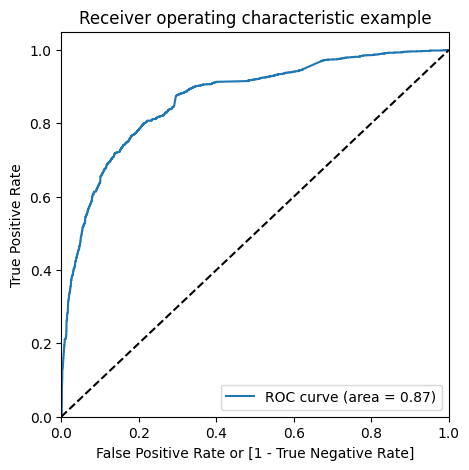

In [131]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The area under curve is 0.87 which is a pretty good value.

In [132]:
#we can try to check the predictions at different cut off and then try to find the optimla cut off value
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.073188,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.009806,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.398970,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.702236,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.798963,7987,1,1,1,1,1,1,1,1,1,0,0


In [133]:
#Here I am creating a dataframe to see various metric such as senstivity, specificity, accuracy at different cut-offs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# creatingconfusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.564793,0.974244,0.308323
0.2,0.2,0.730909,0.906787,0.620743
0.3,0.3,0.772162,0.820114,0.742125
0.4,0.4,0.798142,0.751022,0.827657
0.5,0.5,0.807117,0.689289,0.880922
0.6,0.6,0.797512,0.603843,0.918822
0.7,0.7,0.774996,0.500409,0.946991
0.8,0.8,0.746024,0.387572,0.970551
0.9,0.9,0.689025,0.206868,0.991037


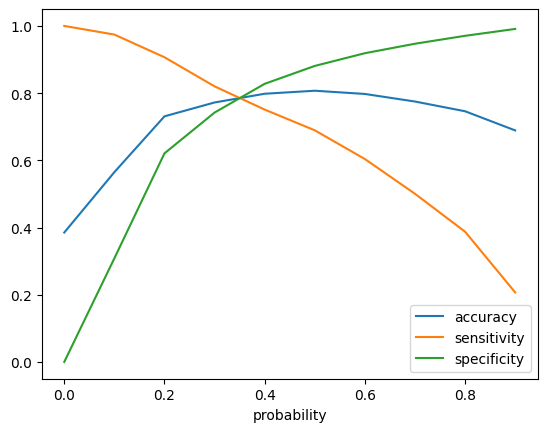

In [134]:
#plotting the values to get more insights through visualization
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()


From the graph we can see that cut-off value of around 0.35 and closer to 4 has high optimization.

**For our model we will try to keep 0.35 as the cut-off value.**

In [135]:
#making predictions keeping 0.35 as the cut-off value than keeping it as 0.5
y_train_pred_final['predicted']=y_train_pred_final.Converted_prob.apply(lambda x:1 if x>0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.073188,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.009806,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.398970,9226,1,1,1,1,1,0,0,0,0,0,0
3,1,0.702236,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.798963,7987,1,1,1,1,1,1,1,1,1,0,0


In [136]:
#creating the final confusion matrix
confusion2=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
confusion2

array([[3115,  790],
       [ 523, 1923]])

In [137]:
#checking the new accuracy we are getting
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.793260903794678

In [138]:
#confusion matrix values
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [139]:
#checking the new value for sensitivity
TP/ float(TP+FN)

0.786181520850368

In [140]:
#checking the new value for specificity
TN/float(TN+FP)

0.7976952624839949

With the current cut off as 0.35 we have accuracy, sensitivity and specificity between 79-80% percent which are good values.

As part of final conversion converting the Conversion_rate to 100

Where high score means high rate of getting converted to Hot lead.
And low score means cold lead.

In [141]:
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.073188,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.009806,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.398970,9226,1,1,1,1,1,0,0,0,0,0,0
3,1,0.702236,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.798963,7987,1,1,1,1,1,1,1,1,1,0,0


In [142]:
y_train_pred_final["Conversion Score"]=y_train_pred_final["Converted_prob"]*100
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Conversion Score
0,0,0.073188,3009,0,1,0,0,0,0,0,0,0,0,0,7.318809
1,0,0.009806,1012,0,1,0,0,0,0,0,0,0,0,0,0.980590
2,0,0.398970,9226,1,1,1,1,1,0,0,0,0,0,0,39.896982
3,1,0.702236,4750,1,1,1,1,1,1,1,1,1,0,0,70.223589
4,1,0.798963,7987,1,1,1,1,1,1,1,1,1,0,0,79.896270


# **Step 9: Making prediction on test set**

This is where we will test our final model 6.10 and see how this model is performing on unseen data which is test dataset.

In [143]:
#one of the important steps is to scale the values of the numerical columns
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
3271,0,5,0,0,0.054054,0.069102,0.072727,5,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,4
1490,1,3,0,0,0.067568,0.665933,0.090909,5,13,12,0,6,1,0,0,0,0,0,0,0,0,25,2,0,0,4,1,2,0,1,4
7936,0,5,0,0,0.027027,0.032570,0.036364,5,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4
4216,2,12,0,0,0.000000,0.000000,0.000000,5,0,4,0,4,1,0,0,0,0,0,0,0,0,3,2,0,0,3,1,2,0,0,8
3830,1,9,0,0,0.108108,0.072183,0.145455,5,13,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,1,4


In [144]:
X_train.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Tags', 'Lead Quality', 'Lead Profile',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [145]:
#now second step is we have to keep only those columns in the X_test data set that were part of our final model
# Substituting all the columns in the final train model
col = X_train.columns

In [146]:
#keeping the same columns in the test data set as well
X_test=X_test[col]
X_test.head()

,Lead Origin,Lead Source,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Tags,Lead Quality,Lead Profile,A free copy of Mastering The Interview
3271,0,5,0,0.069102,0.072727,5,13,0,0,0,0
1490,1,3,0,0.665933,0.090909,5,13,25,2,4,1
7936,0,5,0,0.032570,0.036364,5,13,0,0,0,0
4216,2,12,0,0.000000,0.000000,5,0,3,2,3,0
3830,1,9,0,0.072183,0.145455,5,13,0,0,0,1


In [147]:
#adding the constant
X_test_sm=sm.add_constant(X_test)

In [148]:
#now we will be applying the model res10
# Storing prediction of test set in the variable 'y_test_pred'
y_test_prediction = res10.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_prediction)

# Converting our y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing the index for both dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.050956
1,1,0.911653
2,0,0.048538
3,1,0.626729
4,0,0.097254


In [149]:
#now we will make predictions using 0.35 as our cut-off value
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.050956,0
1,1,0.911653,1
2,0,0.048538,0
3,1,0.626729,1
4,0,0.097254,0


In [150]:
#assigning the conversion score
y_pred_final["Lead Score"]=y_pred_final["Conversion_Prob"]*100
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead Score
0,0,0.050956,0,5.095570
1,1,0.911653,1,91.165343
2,0,0.048538,0,4.853809
3,1,0.626729,1,62.672888
4,0,0.097254,0,9.725427


In [151]:
#starting with our first metrix checking the accuracy on the test data set
print(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted))

0.7836944546456115


In [152]:
#creating the confusion matrix for test data set
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[1335,  399],
       [ 190,  799]])

In [153]:
#confusion matrix values
TP=confusion3[1,1]
TN=confusion3[0,0]
FP=confusion3[0,1]
FN=confusion3[1,0]

In [154]:
# Calculating the sensitivity
TP/(TP+FN)

0.80788675429727

In [155]:
# Calculating the specificity
TN/(TN+FP)

0.7698961937716263

On the test data set our model is able to perform quite well as it was performing on the training data set

**So our final metrics land at:**

1. Cut-off value: 0.35
2. Accuracy: 0.7836944546456115
3. Sensitivity: 0.80788675429727
4. Specificty: 0.7698961937716263

# **Step 10: Precision and Recall**



**Precision:**Precision is the ratio of true positive predictions to the total number of positive predictions made, indicating the accuracy of positive predictions.

**Recall:**Recall is the ratio of true positive predictions to the total number of actual positives, measuring the ability to identify all relevant instances.

In [156]:
#we will be using our confusion3 matrix which is nothing much how the model is performing on the test data set
#calculating the precision value
precision = TP / (TP + FP)
precision

0.6669449081803005

In [157]:
#calculating the recall value
recall = TP / (TP + FN)
recall

0.80788675429727

So from the above values we see that our model is giving an ok precision and we have good recall value at a cut-off value of 0.35

1. Precision:0.6669449081803005
2. Recall: 0.80788675429727

## **10.1: Precision and Recall Tradeoff**

The precision and recall tradeoff refers to the balance between precision and recall in a classification model, where improving one often leads to a decrease in the other.

Precision focuses on the accuracy of positive predictions, meaning it measures how many of the predicted positives are actually correct.
Recall focuses on the ability to capture all actual positive instances, meaning it measures how many of the actual positives are identified by the model.

In [158]:
#importing the correct module
from sklearn.metrics import precision_recall_curve

In [159]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [160]:
#creating the threshold values
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

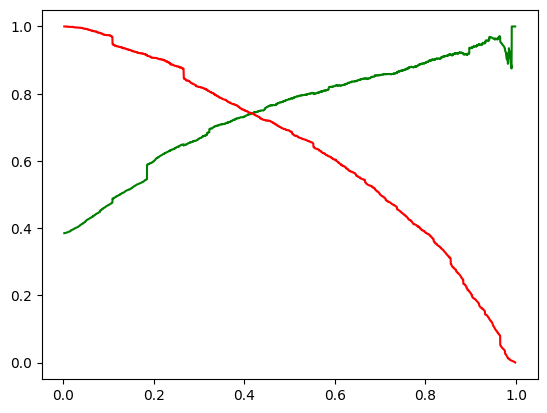

In [161]:
#plotting the threshold
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

So from the above graph we see that at between 0.40 and 0.45 cut-off we see crosses of precision and recall.

For sake of analysis using 0.42 as a cut-off and based on that we will check the accuracy, sensitivity and specificity.

In [162]:
#keeping the cut-off at 0.42
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Conversion Score
0,0,0.073188,3009,0,1,0,0,0,0,0,0,0,0,0,7.318809
1,0,0.009806,1012,0,1,0,0,0,0,0,0,0,0,0,0.980590
2,0,0.398970,9226,0,1,1,1,1,0,0,0,0,0,0,39.896982
3,1,0.702236,4750,1,1,1,1,1,1,1,1,1,0,0,70.223589
4,1,0.798963,7987,1,1,1,1,1,1,1,1,1,0,0,79.896270


In [163]:
#assigning the conversion score
y_train_pred_final["Lead Score"]=y_train_pred_final["Converted_prob"]*100
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Conversion Score,Lead Score
0,0,0.073188,3009,0,1,0,0,0,0,0,0,0,0,0,7.318809,7.318809
1,0,0.009806,1012,0,1,0,0,0,0,0,0,0,0,0,0.980590,0.980590
2,0,0.398970,9226,0,1,1,1,1,0,0,0,0,0,0,39.896982,39.896982
3,1,0.702236,4750,1,1,1,1,1,1,1,1,1,0,0,70.223589,70.223589
4,1,0.798963,7987,1,1,1,1,1,1,1,1,1,0,0,79.896270,79.896270


In [164]:
# checking the accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7994016690284994

In [165]:
#creating the final confusion matrix
confusion4 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion4

array([[3258,  647],
       [ 627, 1819]])

In [166]:
#getting the values for confusion matrix
TP=confusion4[1,1]
TN=confusion4[0,0]
FP=confusion4[0,1]
FN=confusion4[1,0]

In [167]:
#checking the precision value
precision = TP / (TP + FP)
precision

0.7376317923763179

In [168]:
#checking the recall value
recall=TP/(TP+FN)
recall

0.7436631234668847

With the current cut-ff of 0.42 we have precision value of around 73% and recall value at 74% whereas before the cut-off we only had precision of 66% and recall 80%.

Prediction on Test data set

In [169]:
#now we will be applying the model res10
# Storing prediction of test set in the variable 'y_test_pred'
X_test_sm=sm.add_constant(X_test)
y_test_prediction = res10.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_prediction)

# Converting our y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing the index for both dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.050956
1,1,0.911653
2,0,0.048538
3,1,0.626729
4,0,0.097254


In [170]:
#Now we will make predictions on basis of 0.42 cut-off value
y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.050956,0
1,1,0.911653,1
2,0,0.048538,0
3,1,0.626729,1
4,0,0.097254,0


In [171]:
#assigning the conversion score
y_pred_final["Lead Score"]=y_pred_final["Conversion_Prob"]*100
y_pred_final.head()

,Converted,Conversion_Prob,predicted,Lead Score
0,0,0.050956,0,5.095570
1,1,0.911653,1,91.165343
2,0,0.048538,0,4.853809
3,1,0.626729,1,62.672888
4,0,0.097254,0,9.725427


In [172]:
#checking the overall accuracy
print(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.predicted))

0.8002203452074917


In [173]:
#our confusion matrix on test data using 0.42 as cut-off
confusion5 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.predicted )
confusion5

array([[1415,  319],
       [ 225,  764]])

In [174]:
#getting the values for confusion matrix
TP=confusion5[1,1]
TN=confusion5[0,0]
FP=confusion5[0,1]
FN=confusion5[1,0]

In [175]:
#checking the precision value
precision = TP / (TP + FP)
precision

0.7054478301015698

In [176]:
#checking the recall value
recall=TP/(TP+FN)
recall

0.7724974721941354

So we saw that with a cut-off of 0.42 for precision and recall we have good values for both precision and recall.

### **Conclusion**


It was discovered that the most influential factors for potential buyers, in descending order of importance, are:

1. The total time spent on the website.
2. Page view per visit
3. The lead source, specifically when it is:
*   Google
*   Direct Traffic
*   Welingak website
*   Organic search
4. The last activity, particularly when it is:
*   SMS
*   Olark chat conversation
5. The lead origin, especially when it is a landing page submission.
6. Lead quality and profile also play an important role considering High relevance leads are potential leads and will be converted to hot leads.

Considering these factors, X Education has a significant opportunity to convert nearly all potential buyers into actual customers for their courses.

**From the model standpoint final metrics are:**


---


**Different metrics on Training and Testing data set using cut-off for ROC curve at 0.35**

Training Data Set final confusion matrix:

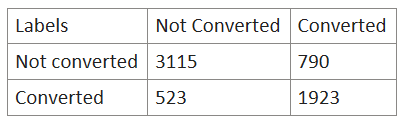

Training Data set metrics:

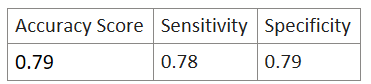

Testing Data Set final confusion matrix:

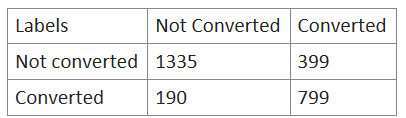

Testing Data set metrics:

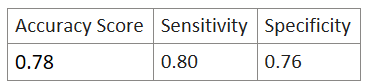

**Different metric on Training and Testing data set using cut-off for Precision and Recall at 0.42**

Training Data Set final confusion matrix:

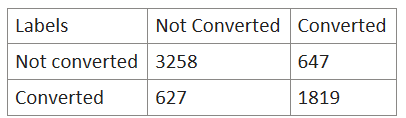

Training Data set metrics:

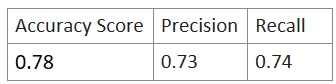

Testing Data Set final confusion matrix:

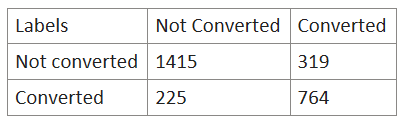

Testing Data set metrics:

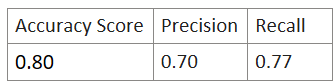

### **END**